___

<img src=https://i.ibb.co/b5xXg11/used-cars1.jpg width="1100" height="100">

[Image Credit](https://myscriptneedshelp.com/2022/auto/buying-used-cars-in-tempe-is-easier-now/)

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;">The Capstone Project of Data Analytics Module</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:150%; text-align:center; border-radius:10px 10px;">Car Price Prediction EDA</p>

<a id="toc"></a>

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Content</p>

* [INTRODUCTION](#0)
* [IMPORTING LIBRARIES NEEDED IN THIS NOTEBOOK](#1)
* [PART-01 (DATA CLEANING)](#2)
* [THE EXAMINATION OF COLUMNS](#3)    
* [THE END OF DATA CLEANING (PART - 01)](#4)

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Introduction</p>

<a id="0"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>


## What is Exploratory Data Analysis?

Exploratory Data Analysis (EDA), also known as Data Exploration, is a step in the Data Analysis Process, where a number of techniques are used to better understand the dataset being used.

‘Understanding the dataset’ can refer to a number of things including but not limited to…

- Extracting important variables and leaving behind useless variables
- Identifying outliers, missing values, or human error
- Understanding the relationship(s), or lack of, between variables
- Ultimately, maximizing your insights of a dataset and minimizing potential error that may occur later in the process

By conducting EDA, you can turn an almost useable dataset into a completely useable dataset.

Exploratory Data Analysis does two main things:

- It helps clean up a dataset.
- It gives you a better understanding of the variables and the relationships between them.

There are main components of exploring data:

- Understanding your variables
- Cleaning your dataset
- Analyzing relationships between variables with Data Visualization

For further reading;

- **🧐 [Mastering Exploratory Data Analysis(EDA) For Data Science Enthusiasts](https://www.analyticsvidhya.com/blog/2021/04/mastering-exploratory-data-analysiseda-for-data-science-enthusiasts/)**

- **🧐 [Exploratory Data Analysis — Visualising, summarising, and interpreting data](https://medium.com/mlearning-ai/exploratory-data-analysis-visualising-summarising-and-interpreting-data-bbe2c9518afb)**
- **🧐 [Exploratory Data Analysis (EDA) techniques for Kaggle competition beginners](https://towardsdatascience.com/exploratory-data-analysis-eda-techniques-for-kaggle-competition-beginners-be4237c3c3a9)**

Let's back to our project.

Welcome to "***Car Price Prediction EDA Project***". This is the capstone project of ***Data Analytics*** Module. **Auto Scout** data used for this project, were scraped from the on-line car trading company, Auto Scout, in 2022, contains many features of 13 different car models. In this project, you will have the opportunity to apply many commonly used algorithms for Data Cleaning and Exploratory Data Analysis by using many Python libraries such as Numpy, Pandas, Matplotlib, Seaborn, Scipy.

The project consists of **3 parts:**
* **``First part``** is related to **``'data cleaning'``**. It deals with Incorrect Headers (Column names), Incorrect Format, Anomalies, Dropping useless columns.
* **``Second part``** is related to **``'filling data'``**. It deals with Missing Values. Categorical to numeric transformation is done.
* **``Third part``** is related to **``'handling outliers of data'``** via Visualisation libraries. Some insights are extracted.

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Importing Libraries Needed in This Notebook</p>

<a id="1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

If you have NOT installed NumPy & Pandas so far, once you've installed them you can import them as a library and other libraries need in this analysis:

**Also, please NOTE that ``Skimpy`` is not yet supported on each Numpy version, requires ``numpy=1.22.2`` as of November, 2022**

In [1]:
# import numpy
# print(numpy.__version__)

# conda install -c conda-forge numpy=1.22.2
# !pip install --force-reinstall numpy==1.22.2 --user

In [2]:
# !pip install skimpy --user
# !pip install skimpy -f https://arg.usask.ca/wheels/
# conda install geopandas  # you have to install it at Anaconda Prompt
# conda install -c conda-forge geopy  # you have to install it at Anaconda Prompt
# !pip install shapely
# conda install descartes  
# !pip install descarteslabs[complete]
# !pip install -U scikit-learn

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import re

from skimpy import clean_columns
# import requests
# import geopy
# from geopy.geocoders import Nominatim

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

%matplotlib inline
# %matplotlib notebook

plt.rcParams["figure.figsize"] = (10, 6)
# plt.rcParams['figure.dpi'] = 100

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.2f' % x)

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [4]:
def show_distribution(col):
    
    '''
    
    This function will prints a Histogram and box plot which are graphical representations 
    for the frequency of numeric data values. It aims to describe the data and explore 
    the central tendency and variability before using advanced statistical analysis techniques. 
    
    '''
    # Get statistics
    from termcolor import colored

    print(colored('Statistical Calculations :', 'red', attrs=['bold']))
    print(colored('-'*26, 'red', attrs=['bold']))    
    min_val = col.min()
    max_val = col.max()
    mean_val = col.mean()
    med_val = col.median()
    mod_val = col.mode()[0]

    print(colored('Minimum:{:>7.2f}\nMean:{:>10.2f}\nMedian:{:>8.2f}\nMode:{:>10.2f}\nMaximum:{:>7.2f}\n'.format(min_val,
                                                                                             mean_val,
                                                                                             med_val,
                                                                                             mod_val,
                                                                                             max_val), 'blue', attrs=['bold']))
    
    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize=(15, 15))

    # Plot the histogram   
    ax[0].hist(col, bins=30)
    ax[0].set_ylabel('Frequency', fontsize=10)

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val,  color='orange',     linestyle='dashed', linewidth=2, label='Minimum')
    ax[0].axvline(x=mean_val, color='lightgreen', linestyle='dashed', linewidth=2, label='Mean')
    ax[0].axvline(x=med_val,  color='cyan',       linestyle='dashed', linewidth=2, label='Median')
    ax[0].axvline(x=mod_val,  color='purple',     linestyle='dashed', linewidth=2, label='Mode')
    ax[0].axvline(x=max_val,  color='red',        linestyle='dashed', linewidth=2, label='Maximum')
    ax[0].legend(loc='upper right')

    # Plot the boxplot   
    medianprops = dict(linestyle='-', linewidth=3, color='m')
    boxprops=dict(linestyle='-', linewidth=1.5)
    meanprops={"marker":"d", "markerfacecolor":"blue", "markeredgecolor":"black", "markersize":"10"}
    flierprops={'marker': 'o', 'markersize': 8, 'markerfacecolor': 'fuchsia'}
    
    ax[1].boxplot(col, 
                  vert=False,
                  notch=True, 
                  patch_artist=False,
                  medianprops=medianprops,
                  flierprops=flierprops,
                  showmeans=True,
                  meanprops=meanprops)
    
    ax[1].set_xlabel('value', fontsize=10)
    

    # Add a title to the Figure
    fig.suptitle('Data Distribution', fontsize=20)

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">PART- 01 (Data Cleaning)</p>

<a id="2"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

Data cleaning is the process of ensuring that your data is correct and useable by identifying any errors in the data, or missing data by correcting or deleting them.

Cleaning up data is the first and most important step, as it ensures the quality of the data is met to prepare data for visualization.

The steps in cleaning the data as;

- Checking Null entries
- Removing Null Entries
- Filling values in place of Null Entries (If Numerical feature)
- Checking Duplicates
- Removing Duplicates

**Now let us begin our analysis by reading & assigning our dataset to a Pandas object as df (📝 Besides, in case the original one might be needed in any phase of the analysis, the dataset will be copied at the beginning and before going further because any change made throughout the analysis will change the data as well):**

In [5]:
df0 = pd.read_json("as24_cars.zip")
df = df0.copy()

# In some cases, without lines=True, you will get "ValueError: Trailing data"
# The following image represents the original view of Json file opened by VScode

As seen in the image, it looks like you're loading a JSON file which has JSON data on each separate line. This means that .json file at hand contains **one JSON object in each line** as per the specification. In these circumstances, the answer to how you read it into a data frame in Pandas is that you have to read it **line by line** using lines=True.

![JSON_FILE_ERROR](https://i.ibb.co/4j0SJqW/autoscout-json.png)

In [6]:
df.head(3).T

,0,1,2
make_model,Mercedes-Benz A 160,Mercedes-Benz EQE 350,Mercedes-Benz A 45 AMG
short_description,CDi,350+,S 4Matic+ 8G-DCT
make,\nMercedes-Benz\n,\nMercedes-Benz\n,\nMercedes-Benz\n
model,"[\n, A 160 ,\n]","[\n, EQE 350 ,\n]","[\n, A 45 AMG ,\n]"
location,"P.I. EL PALMAR C/FORJA 6, 11500 PUERTO DE SAN...","APARTADO DE CORREOS 1032, 26140 LOGROÑO, ES","PORT. TARRACO, MOLL DE LLEVANT, Nº 5, LOC. 6-8..."
price,"€ 16,950.-","€ 80,900.-","€ 69,900.-"
Body type,"[\n, Compact, \n]","[\n, Compact, \n]","[\n, Compact, \n]"
Type,"[\n, Used, \n]","[\n, Pre-registered, \n]","[\n, Used, \n]"
Doors,"[\n, 5, \n]","[\n, 4, \n]","[\n, 5, \n]"
Country version,"[\n, Spain, \n]","[\n, Spain, \n]","[\n, Spain, \n]"


In [7]:
df.shape

(29480, 58)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29480 entries, 0 to 29479
Data columns (total 58 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   make_model                28630 non-null  object 
 1   short_description         28630 non-null  object 
 2   make                      28630 non-null  object 
 3   model                     28630 non-null  object 
 4   location                  28630 non-null  object 
 5   price                     28630 non-null  object 
 6   Body type                 28630 non-null  object 
 7   Type                      28630 non-null  object 
 8   Doors                     28271 non-null  object 
 9   Country version           16889 non-null  object 
 10  Offer number              23100 non-null  object 
 11  Warranty                  15784 non-null  object 
 12  Mileage                   28629 non-null  object 
 13  First registration        28628 non-null  object 
 14  Gearbo

In [9]:
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

def check_obj_columns(df):
    '''
    Returns NO PROBLEM or column/s which has/have mixed object types.
    '''    
    
    tdf = df.select_dtypes(include=['object']).applymap(type)
    for col in tdf:
        if len(set(tdf[col].values)) > 1:
            print("Column" + " " + color.BOLD + color.RED + col + color.END + " " + "has mixed object types." )
    else:
        if len(set(tdf[col].values)) == 1:
            print(color.BOLD + color.GREEN + " " + "NO PROBLEM" + " " + color.END + " " + "with the data types of Columns in the DataFrame.")

check_obj_columns(df)

Column make_model has mixed object types.
Column short_description has mixed object types.
Column make has mixed object types.
Column model has mixed object types.
Column location has mixed object types.
Column price has mixed object types.
Column Body type has mixed object types.
Column Type has mixed object types.
Column Doors has mixed object types.
Column Country version has mixed object types.
Column Offer number has mixed object types.
Column Warranty has mixed object types.
Column Mileage has mixed object types.
Column First registration has mixed object types.
Column Gearbox has mixed object types.
Column Fuel type has mixed object types.
Column Colour has mixed object types.
Column Paint has mixed object types.
Column desc has mixed object types.
Column seller has mixed object types.
Column Seats has mixed object types.
Column Power has mixed object types.
Column Engine size has mixed object types.
Column Gears has mixed object types.
Column CO₂-emissions has mixed object type

In [10]:
df.columns

# sorted(df.columns)

Index(['make_model', 'short_description', 'make', 'model', 'location', 'price',
       'Body type', 'Type', 'Doors', 'Country version', 'Offer number',
       'Warranty', 'Mileage', 'First registration', 'Gearbox', 'Fuel type',
       'Colour', 'Paint', 'desc', 'seller', 'Seats', 'Power', 'Engine size',
       'Gears', 'CO₂-emissions', 'Manufacturer colour', 'Drivetrain',
       'Cylinders', 'Fuel consumption', '\nComfort & Convenience\n',
       '\nEntertainment & Media\n', '\nSafety & Security\n', '\nExtras\n',
       'Empty weight', 'Model code', 'General inspection', 'Last service',
       'Full service history', 'Non-smoker vehicle', 'Emission class',
       'Emissions sticker', 'Upholstery colour', 'Upholstery',
       'Production date', 'Previous owner', 'Other fuel types',
       'Power consumption', 'Energy efficiency class', 'CO₂-efficiency',
       'Fuel consumption (WLTP)', 'CO₂-emissions (WLTP)', 'Available from',
       'Taxi or rental car', 'Availability', 'Last timing b

**Let us rectify the** **``Incorrect Headers (Column names)``**

One way of renaming the columns in a Pandas dataframe is by using the **``rename()``** function. This method is quite useful when we need to rename some selected columns because we need to specify information only for the columns which are to be renamed **🧐 [Source](https://www.geeksforgeeks.org/how-to-rename-columns-in-pandas-dataframe/)**.

For skimpy library, please have look at this article named **🧐 [How to Clean Messy Pandas Column Names](https://towardsdatascience.com/how-to-clean-messy-pandas-column-names-20dc7400cea7)**

In [11]:
# First Method

from skimpy import clean_columns

df = clean_columns(df)
df.head(3)

50 column names have been cleaned

,make_model,short_description,make,model,location,price,body_type,type,doors,country_version,offer_number,warranty,mileage,first_registration,gearbox,fuel_type,colour,paint,desc,seller,seats,power,engine_size,gears,co_emissions,manufacturer_colour,drivetrain,cylinders,fuel_consumption,comfort_&_convenience,entertainment_&_media,safety_&_security,extras,empty_weight,model_code,general_inspection,last_service,full_service_history,non_smoker_vehicle,emission_class,emissions_sticker,upholstery_colour,upholstery,production_date,previous_owner,other_fuel_types,power_consumption,energy_efficiency_class,co_efficiency,fuel_consumption_wltp,co_emissions_wltp,available_from,taxi_or_rental_car,availability,last_timing_belt_change,electric_range_wltp,power_consumption_wltp,battery_ownership
0,Mercedes-Benz A 160,CDi,\nMercedes-Benz\n,"[\n, A 160 ,\n]","P.I. EL PALMAR C/FORJA 6, 11500 PUERTO DE SAN...","€ 16,950.-","[\n, Compact, \n]","[\n, Used, \n]","[\n, 5, \n]","[\n, Spain, \n]","[\n, 7468157, \n]","[\n, 24 months, \n]","120,200 km",06/2016,[\nManual\n],Diesel,Black,Metallic,"[ , Precio al contado: 16950 euros, , , Vehí...",Dealer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Mercedes-Benz EQE 350,350+,\nMercedes-Benz\n,"[\n, EQE 350 ,\n]","APARTADO DE CORREOS 1032, 26140 LOGROÑO, ES","€ 80,900.-","[\n, Compact, \n]","[\n, Pre-registered, \n]","[\n, 4, \n]","[\n, Spain, \n]","[\n, 7054863, \n]","[\n, 24 months, \n]","5,000 km",06/2022,[\nAutomatic\n],Electric,NaN,NaN,"[ , Precio al contado: 88900 euros, , AUTO OJ...",Dealer,"[\n, 5, \n]",[\n215 kW (292 hp)\n],[\n1 cc\n],[\n9\n],0 g/km (comb.),Negro Obsidiana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mercedes-Benz A 45 AMG,S 4Matic+ 8G-DCT,\nMercedes-Benz\n,"[\n, A 45 AMG ,\n]","PORT. TARRACO, MOLL DE LLEVANT, Nº 5, LOC. 6-8...","€ 69,900.-","[\n, Compact, \n]","[\n, Used, \n]","[\n, 5, \n]","[\n, Spain, \n]","[\n, 7410454, \n]","[\n, 12 months, \n]","18,900 km",07/2020,[\nAutomatic\n],Gasoline,Grey,NaN,"[Gris MANUFAKTUR mountaingrau magno, , Linea/...",Dealer,"[\n, 5, \n]",[\n310 kW (421 hp)\n],"[\n1,991 cc\n]",[\n8\n],NaN,Mountaingrau magno,"[\n, 4WD, \n]",[\n4\n],"[[8.4 l/100 km (comb.)], [10.9 l/100 km (city)...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.columns

Index(['make_model', 'short_description', 'make', 'model', 'location', 'price',
       'body_type', 'type', 'doors', 'country_version', 'offer_number',
       'warranty', 'mileage', 'first_registration', 'gearbox', 'fuel_type',
       'colour', 'paint', 'desc', 'seller', 'seats', 'power', 'engine_size',
       'gears', 'co_emissions', 'manufacturer_colour', 'drivetrain',
       'cylinders', 'fuel_consumption', 'comfort_&_convenience',
       'entertainment_&_media', 'safety_&_security', 'extras', 'empty_weight',
       'model_code', 'general_inspection', 'last_service',
       'full_service_history', 'non_smoker_vehicle', 'emission_class',
       'emissions_sticker', 'upholstery_colour', 'upholstery',
       'production_date', 'previous_owner', 'other_fuel_types',
       'power_consumption', 'energy_efficiency_class', 'co_efficiency',
       'fuel_consumption_wltp', 'co_emissions_wltp', 'available_from',
       'taxi_or_rental_car', 'availability', 'last_timing_belt_change',
       'el

In [13]:
# from skimpy import skim

# skim(df)

In [14]:
# # Second Method

# df["Comfort_Convenience"] = df["\nComfort & Convenience\n"]
# df["Entertainment_Media"] = df["\nEntertainment & Media\n"]
# df["Extras"] = df["\nExtras\n"]
# df["Safety_Security"] = df["\nSafety & Security\n"]

# drop_columns = ["\nComfort & Convenience\n", "\nEntertainment & Media\n", "\nExtras\n", "\nSafety & Security\n"]

# df.drop(drop_columns, axis=1, inplace=True)

In [15]:
# # Third Method

# df.rename(columns={"\nComfort & Convenience\n": "Comfort_Convenience",
#                    "\nEntertainment & Media\n":"Entertainment_Media",
#                    "\nExtras\n":"Extras",
#                    "\nSafety & Security\n":"Safety_Security"}, 
#                     .,
#                     .,
#                     .,
#                     inplace=True)

# df.head(3)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29480 entries, 0 to 29479
Data columns (total 58 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   make_model               28630 non-null  object 
 1   short_description        28630 non-null  object 
 2   make                     28630 non-null  object 
 3   model                    28630 non-null  object 
 4   location                 28630 non-null  object 
 5   price                    28630 non-null  object 
 6   body_type                28630 non-null  object 
 7   type                     28630 non-null  object 
 8   doors                    28271 non-null  object 
 9   country_version          16889 non-null  object 
 10  offer_number             23100 non-null  object 
 11  warranty                 15784 non-null  object 
 12  mileage                  28629 non-null  object 
 13  first_registration       28628 non-null  object 
 14  gearbox               

In [17]:
df.shape

(29480, 58)

### The Examination of Missing Values:

In [18]:
df.isnull().sum()

make_model                   850
short_description            850
make                         850
model                        850
location                     850
price                        850
body_type                    850
type                         850
doors                       1209
country_version            12591
offer_number                6380
warranty                   13696
mileage                      851
first_registration           852
gearbox                     1098
fuel_type                   2637
colour                      2574
paint                      14985
desc                        1433
seller                       850
seats                       3975
power                       1422
engine_size                 2253
gears                      10526
co_emissions               10886
manufacturer_colour         7693
drivetrain                 12587
cylinders                  10628
fuel_consumption            6095
comfort_&_convenience       4047
entertainm

In [19]:
df.isnull().sum()*100 / df.shape[0]

make_model                 2.88
short_description          2.88
make                       2.88
model                      2.88
location                   2.88
price                      2.88
body_type                  2.88
type                       2.88
doors                      4.10
country_version           42.71
offer_number              21.64
warranty                  46.46
mileage                    2.89
first_registration         2.89
gearbox                    3.72
fuel_type                  8.95
colour                     8.73
paint                     50.83
desc                       4.86
seller                     2.88
seats                     13.48
power                      4.82
engine_size                7.64
gears                     35.71
co_emissions              36.93
manufacturer_colour       26.10
drivetrain                42.70
cylinders                 36.05
fuel_consumption          20.68
comfort_&_convenience     13.73
entertainment_&_media     19.80
safety_&

**Droping columns that have missing values more than %80.**

In [20]:
def df_nans(df, limit):
    missing = df.isnull().sum()*100 / df.shape[0]
    return missing.loc[lambda x : x >= limit]

def column_nans(serial):
    # display percentage of nans in a Series
    return serial.isnull().sum()*100 / serial.shape[0]

In [21]:
df_nans(df, 80)

last_service              93.21
other_fuel_types          92.15
power_consumption         98.25
fuel_consumption_wltp     99.66
co_emissions_wltp         99.61
available_from            98.67
taxi_or_rental_car        98.57
availability              98.98
last_timing_belt_change   98.06
electric_range_wltp       99.95
power_consumption_wltp    99.95
battery_ownership         99.98
dtype: float64

**Let us check one of them:**

In [22]:
column_nans(df["power_consumption_wltp"])

99.94572591587517

**Let us assign the features having missing values more than 80% to an object** 

In [23]:
drop_columns = df_nans(df, 80).index
drop_columns

Index(['last_service', 'other_fuel_types', 'power_consumption',
       'fuel_consumption_wltp', 'co_emissions_wltp', 'available_from',
       'taxi_or_rental_car', 'availability', 'last_timing_belt_change',
       'electric_range_wltp', 'power_consumption_wltp', 'battery_ownership'],
      dtype='object')

In [24]:
df.drop(drop_columns, axis=1, inplace=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29480 entries, 0 to 29479
Data columns (total 46 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   make_model               28630 non-null  object 
 1   short_description        28630 non-null  object 
 2   make                     28630 non-null  object 
 3   model                    28630 non-null  object 
 4   location                 28630 non-null  object 
 5   price                    28630 non-null  object 
 6   body_type                28630 non-null  object 
 7   type                     28630 non-null  object 
 8   doors                    28271 non-null  object 
 9   country_version          16889 non-null  object 
 10  offer_number             23100 non-null  object 
 11  warranty                 15784 non-null  object 
 12  mileage                  28629 non-null  object 
 13  first_registration       28628 non-null  object 
 14  gearbox               

In [26]:
df.shape

(29480, 46)

### The Examination of Duplicated Values:

In [27]:
# df.duplicated()

# Gives TypeError: unhashable type: 'list'

df.astype(str).duplicated(keep=False).sum()

4384

In [28]:
df[df.astype(str).duplicated(keep=False)]

,make_model,short_description,make,model,location,price,body_type,type,doors,country_version,offer_number,warranty,mileage,first_registration,gearbox,fuel_type,colour,paint,desc,seller,seats,power,engine_size,gears,co_emissions,manufacturer_colour,drivetrain,cylinders,fuel_consumption,comfort_&_convenience,entertainment_&_media,safety_&_security,extras,empty_weight,model_code,general_inspection,full_service_history,non_smoker_vehicle,emission_class,emissions_sticker,upholstery_colour,upholstery,production_date,previous_owner,energy_efficiency_class,co_efficiency
579,Mercedes-Benz SLK 200,Kompressor Aut. Cabrio Final Edition,\nMercedes-Benz\n,"[\n, SLK 200 ,\n]","Marienborner Str. 49, 55128 Mainz, DE","€ 15,990.-","[\n, Convertible, \n]","[\n, Used, \n]","[\n, 2, \n]","[\n, Germany, \n]",NaN,"[\n, Yes, \n]","39,000 km",05/2003,[\nAutomatic\n],Regular/Benzine 91,Silver,Metallic,[Zum Verkauf steht ein gepflegter Mercedes-Ben...,Dealer,"[\n, 2, \n]",[\n120 kW (163 hp)\n],"[\n1,998 cc\n]",NaN,235 g/km (comb.),Brillantsilber metallic,NaN,NaN,"[[9.6 l/100 km (comb.)], [14.4 l/100 km (city)...","[Air conditioning, Armrest, Cruise control, El...","[CD player, Radio]","[Alarm system, Central door lock, Driver-side ...","[Alloy wheels, Sport seats]",NaN,NaN,New,NaN,Yes,Euro 4,4 (Green),Black,Full leather,NaN,"[[39,000 km, 05/2003], 1]",NaN,NaN
580,Mercedes-Benz SLK 200,Kompressor Aut. Cabrio Final Edition,\nMercedes-Benz\n,"[\n, SLK 200 ,\n]","Marienborner Str. 49, 55128 Mainz, DE","€ 15,990.-","[\n, Convertible, \n]","[\n, Used, \n]","[\n, 2, \n]","[\n, Germany, \n]",NaN,"[\n, Yes, \n]","39,000 km",05/2003,[\nAutomatic\n],Regular/Benzine 91,Silver,Metallic,[Zum Verkauf steht ein gepflegter Mercedes-Ben...,Dealer,"[\n, 2, \n]",[\n120 kW (163 hp)\n],"[\n1,998 cc\n]",NaN,235 g/km (comb.),Brillantsilber metallic,NaN,NaN,"[[9.6 l/100 km (comb.)], [14.4 l/100 km (city)...","[Air conditioning, Armrest, Cruise control, El...","[CD player, Radio]","[Alarm system, Central door lock, Driver-side ...","[Alloy wheels, Sport seats]",NaN,NaN,New,NaN,Yes,Euro 4,4 (Green),Black,Full leather,NaN,"[[39,000 km, 05/2003], 1]",NaN,NaN
610,Mercedes-Benz G 500,Cabrio LORINSER UMBAU/AHK/ELEKTR. SITZE,\nMercedes-Benz\n,"[\n, G 500 ,\n]","Alte Bundesstr. 45, 71332 Waiblingen, DE","€ 209,000.-","[\n, Convertible, \n]","[\n, Used, \n]","[\n, 3, \n]",NaN,"[\n, 29474, \n]",NaN,"172,000 km",02/1999,[\nAutomatic\n],Regular/Benzine 91 (Particle filter),Black,Metallic,"[unfallfrei, scheckheftgepflegt, Nichtraucher,...",Dealer,"[\n, 5, \n]",[\n218 kW (296 hp)\n],"[\n4,996 cc\n]",NaN,400 g/km (comb.),Schwarz obsidianschwarz metall,"[\n, 4WD, \n]",NaN,"[[16.7 l/100 km (comb.)], [21.8 l/100 km (city...","[Air conditioning, Armrest, Cruise control, El...","[On-board computer, Radio]","[Central door lock, Driver-side airbag, Fog li...","[Alloy wheels, Trailer hitch, Tuned car]","[\n2,350 kg\n]","[\n, 0710/403, \n]",New,Yes,Yes,Euro 4,4 (Green),Black,Full leather,1999.00,"[[172,000 km, 02/1999], 2]",G,Calculated on basis of measured CO₂-emissions ...
613,Mercedes-Benz G 500,Cabrio LORINSER UMBAU/AHK/ELEKTR. SITZE,\nMercedes-Benz\n,"[\n, G 500 ,\n]","Alte Bundesstr. 45, 71332 Waiblingen, DE","€ 209,000.-","[\n, Convertible, \n]","[\n, Used, \n]","[\n, 3, \n]",NaN,"[\n, 29474, \n]",NaN,"172,000 km",02/1999,[\nAutomatic\n],Regular/Benzine 91 (Particle filter),Black,Metallic,"[unfallfrei, scheckheftgepflegt, Nichtraucher,...",Dealer,"[\n, 5, \n]",[\n218 kW (296 hp)\n],"[\n4,996 cc\n]",NaN,400 g/km (comb.),Schwarz obsidianschwarz metall,"[\n, 4WD, \n]",NaN,"[[16.7 l/100 km (comb.)], [21.8 l/100 km (city...","[Air conditioning, Armrest, Cruise control, El...","[On-board computer, Radio]","[Central door lock, Driver-side airbag, Fog li...","[Alloy wheels, Trailer hitch, Tuned car]","[\n2,350 kg\n]","[\n, 0710/403, \n]",New,Yes,Yes,Euro 4,4 (Green),Black,Full leather,1999.00,"[[172,000 km, 02/1999], 2]",G,Calculated on basis of measured CO₂-emissions ...
839,Mercedes-Benz CLA 45 AMG,4M

The reason behind this is the list contains list of values. That’s because the list values in each row can **NOT** be hashable. Like: [[9.2 l/100 km (comb.)], [13 l/100 km (city)],...] in "Fuel consumption" feature  

So, how do we solve the problem?

**🧐 [TypeError: unhashable type: ‘list’! How to Drop Duplicates with Lists in Pandas](https://jianan-lin.medium.com/typeerror-unhashable-type-list-how-to-drop-duplicates-with-lists-in-pandas-45d9e4dd2f6c)**

In [29]:
df[df.astype(str).duplicated(['make_model', 'short_description', 'location'], keep=False)]['make_model'].value_counts(dropna=True)

Volvo C70              690
Volvo V40              678
Volvo XC60             350
Volvo V60              308
Volvo C30              228
                      ... 
Mercedes-Benz V 250      2
Toyota Camry             2
Toyota Avensis           2
Mercedes-Benz S 500      2
Volvo 945                2
Name: make_model, Length: 198, dtype: int64

In [30]:
df[df.astype(str)['make_model'] == 'Volvo C70']

,make_model,short_description,make,model,location,price,body_type,type,doors,country_version,offer_number,warranty,mileage,first_registration,gearbox,fuel_type,colour,paint,desc,seller,seats,power,engine_size,gears,co_emissions,manufacturer_colour,drivetrain,cylinders,fuel_consumption,comfort_&_convenience,entertainment_&_media,safety_&_security,extras,empty_weight,model_code,general_inspection,full_service_history,non_smoker_vehicle,emission_class,emissions_sticker,upholstery_colour,upholstery,production_date,previous_owner,energy_efficiency_class,co_efficiency
26470,Volvo C70,T5 Summum,\nVolvo\n,"[\n, C70 ,\n]","RIO ULLA 15, 28017 MADRID, ES","€ 11,999.-","[\n, Convertible, \n]","[\n, Used, \n]","[\n, 2, \n]","[\n, Spain, \n]","[\n, 7211423, \n]","[\n, 12 months, \n]","199,000 km",03/2006,[\nManual\n],Gasoline,Beige,Metallic,"[Volvo C70 T5 220cv, Marzo 2006 único dueño, 1...",Dealer,"[\n, 4, \n]",[\n162 kW (220 hp)\n],"[\n2,435 cc\n]",[\n6\n],NaN,NaN,"[\n, Front, \n]",[\n5\n],"[[9.1 l/100 km (comb.)], [11.8 l/100 km (city)...","[Air conditioning, Automatic climate control, ...",NaN,"[ABS, Central door lock, Driver-side airbag, F...",[Alloy wheels],"[\n1,711 kg\n]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26471,Volvo C70,2.4i Momentum,\nVolvo\n,"[\n, C70 ,\n]","Auf dem Sand 28, 40721 Hilden, DE","€ 11,880.-","[\n, Convertible, \n]","[\n, Used, \n]","[\n, 2, \n]","[\n, Germany, \n]","[\n, 001731_3386, \n]","[\n, 12 months, \n]","155,923 km",08/2006,[\nManual\n],Super Plus 98,Gold,Metallic,"[ * ABS, * Airbag Fahrerseite, * Airbag auf ...",Dealer,"[\n, 4, \n]",[\n125 kW (170 hp)\n],"[\n2,435 cc\n]",[\n5\n],215 g/km (comb.),ZANZIBAR GOLD PEARL,"[\n, Front, \n]",[\n5\n],"[[9 l/100 km (comb.)], [12.9 l/100 km (city)],...","[Air conditioning, Armrest, Automatic climate ...","[CD player, On-board computer, Radio, Sound sy...","[ABS, Bi-Xenon headlights, Central door lock, ...","[Alloy wheels (18""), Automatically dimming int...","[\n1,685 kg\n]","[\n, 9101/ABY, \n]",New,Yes,NaN,Euro 4,4 (Green),Beige,Part leather,NaN,"[[155,923 km, 08/2006], 2]",F,Calculated on basis of measured CO₂-emissions ...
26472,Volvo C70,2.5T 220PS Cabriolet T5 Summum 1.Hand Xenon,\nVolvo\n,"[\n, C70 ,\n]","Lichterfelder Allee 14, 14513 Teltow, DE","€ 20,999.-","[\n, Convertible, \n]","[\n, Used, \n]","[\n, 2, \n]","[\n, Germany, \n]","[\n, 280, \n]","[\n, Yes, \n]","69,747 km",05/2007,[\nAutomatic\n],Regular/Benzine E10 91,Black,Metallic,[Herzlich Willkommen bei der Autohaus Klann Gm...,Dealer,"[\n, 4, \n]",[\n162 kW (220 hp)\n],"[\n2,521 cc\n]",NaN,234 g/km (comb.),Black Sapphire Metallic,NaN,NaN,"[[9.8 l/100 km (comb.)], [14.7 l/100 km (city)...","[Air conditioning, Armrest, Automatic climate ...","[CD player, On-board computer, Radio, Sound sy...","[ABS, Bi-Xenon headlights, Central door lock, ...","[All season tyres, Alloy wheels, Automatically...",NaN,NaN,04/2024,Yes,Yes,Euro 4,4 (Green),Grey,Full leather,NaN,"[[69,747 km, 05/2007], 1]",NaN,NaN
26473,Volvo C70,2.0 D3 150PS Cabriolet Momentum Automatik,\nVolvo\n,"[\n, C70 ,\n]","Lichterfelder Allee 14, 14513 Teltow, DE","€ 14,999.-","[\n, Convertible, \n]","[\n, Used, \n]","[\n, 2, \n]","[\n, Germany, \n]","[\n, 494-P2, \n]","[\n, Yes, \n]","146,348 km",10/2011,[\nAutomatic\n],Diesel,Blue,Metallic,[Herzlich Willkommen bei der Autohaus Klann Gm...,Dealer,"[\n, 4, \n]",[\n110 kW (150 hp)\n],"[\n1,984 cc\n]",NaN,NaN,CASPIAN BLUE METALLIC,NaN,NaN,NaN,"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, CD player, Hands-free equipment, O...","[ABS, Central door lock, Driver-side airbag, E...","[All season tyres, Alloy wheels, Automatically...",NaN,NaN,08/2023,Yes,Yes,Euro 5,4 (Green),Black,Part leather,NaN,"[[146,348 km, 10/2011], 1]",NaN,NaN
26474,Volvo C70,2.0D SUMMUM,\nVolvo\n,"[\n, C70 ,\n]",POL. IND. DE CROSS 39600 SANTANDER CANTABRIA E...,"€ 9,900.-","[\n, Convertible, \n]","[\n, Used, \n]","[\n, 2, \n]","[\n, Spain, \n]","[\n, 7273637, \n]","[\n, 12 months, \n]","144,000 km",05/2008,

In [31]:
df[df['make_model'] == 'Volvo C70'].astype(str).duplicated(keep=False).value_counts(dropna=False)

True     690
False      2
dtype: int64

In [32]:
# df.drop_duplicates(keep="first", inplace=True)

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">The Examination of Columns</p>

⚠️ It's highly crucial for any analysis to get domain knowledge about the subject at hand before starting the examination of features/columns one by one. Therefore, always make search on that and keep scrutinizing/reading throughout your analysis

**[12 Factors That Affect Your Car’s Resale Value](https://www.moneycrashers.com/factors-affect-used-cars-resale-value/)**

**[9 Factors That Impact The Value of Your Car](https://carchase.com.au/resources/car-valuation-guide/9-factors-that-impact-the-value-of-your-car/)**

**[Factors That Can Affect Used Car Trade-In Value](https://www.capitalone.com/cars/learn/managing-your-money-wisely/factors-that-can-affect-used-car-tradein-value/1224)**

**[7 Factors That Influence the Price of a Used Car](https://www.truebil.com/blog/7-factors-that-influence-the-price-of-a-used-car)**

**[A Study on the Factors Affecting the Value of Used Cars](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwjns7id59L7AhWfhv0HHUflBkwQFnoECCkQAQ&url=https%3A%2F%2Fwww.atlantis-press.com%2Farticle%2F25891081.pdf&usg=AOvVaw3JqJ5XKF1Wk0PC_56OSfal)**

**[What are the factors that influence a used car price?](https://carsellzone.com/blog/detail/factors-affect-car-price)**

<a id="3"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

## Let's examine and clean all the columns/features one by one

In [33]:
# function for first looking to the columns

def first_looking(col):
    print("column name    : ", col)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum()*100 / df.shape[0], 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].astype(str).nunique())
    print("--------------------------------")
    print(df[col].value_counts(dropna = False))

## price (target/label column)

In [34]:
first_looking("price")

column name    :  price
--------------------------------
per_of_nulls   :  % 2.88
num_of_nulls   :  850
num_of_uniques :  5022
--------------------------------
NaN           850
€ 14,990.-    222
€ 12,990.-    219
€ 16,990.-    186
€ 19,990.-    166
             ... 
€ 19,112.-      1
€ 30,465.-      1
€ 18,461.-      1
€ 22,649.-      1
€ 4,440.-       1
Name: price, Length: 5022, dtype: int64


In [35]:
df[df["price"].isnull()].sample(20)

,make_model,short_description,make,model,location,price,body_type,type,doors,country_version,offer_number,warranty,mileage,first_registration,gearbox,fuel_type,colour,paint,desc,seller,seats,power,engine_size,gears,co_emissions,manufacturer_colour,drivetrain,cylinders,fuel_consumption,comfort_&_convenience,entertainment_&_media,safety_&_security,extras,empty_weight,model_code,general_inspection,full_service_history,non_smoker_vehicle,emission_class,emissions_sticker,upholstery_colour,upholstery,production_date,previous_owner,energy_efficiency_class,co_efficiency
21084,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19866,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15484,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
df['price'].astype(str).str.extract('(\d+.\d+)')

,0
0,"16,950"
1,"80,900"
2,"69,900"
3,"46,990"
4,"16,800"
...,...
29475,"5,499"
29476,"7,300"
29477,"29,900"
29478,"4,440"


In [37]:
# df['price'].explode().str.strip("€, .-").str.replace(",", "")

df['price'] = df['price'].astype(str).str.extract('(\d+.\d+)')
df['price'] = df['price'].str.replace(",", "").astype(float)
df['price'] 

0       16950.00
1       80900.00
2       69900.00
3       46990.00
4       16800.00
          ...   
29475    5499.00
29476    7300.00
29477   29900.00
29478    4440.00
29479        NaN
Name: price, Length: 29480, dtype: float64

In [38]:
display(df.price.isnull().sum())
display(df.shape)

850

(29480, 46)

In [39]:
df.dropna(how='all', inplace=True)

In [40]:
display(df.price.isnull().sum())
display(df.shape)

# 29480 - 28630 = 850

0

(28630, 46)

In [41]:
df['price'].describe()

count    28630.00
mean     23470.66
std      23953.50
min        490.00
25%      11990.00
50%      17979.00
75%      27990.00
max     999999.00
Name: price, dtype: float64

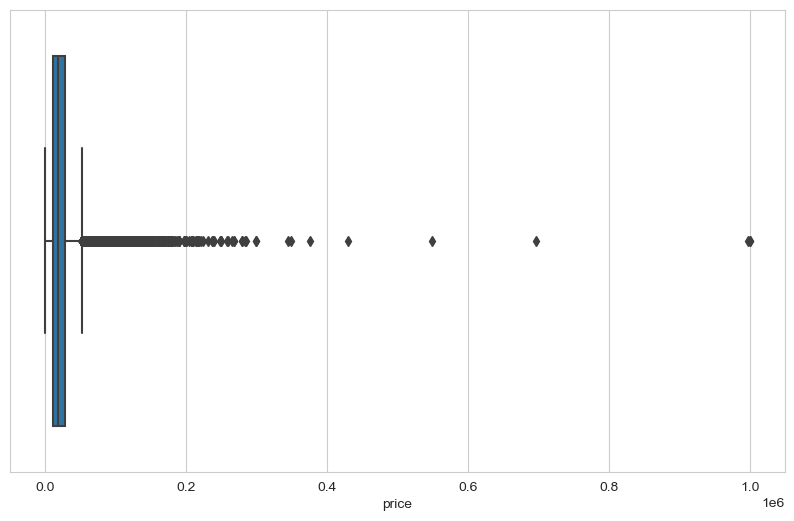

In [42]:
sns.boxplot(df.price);

# plt.ticklabel_format(style='plain');

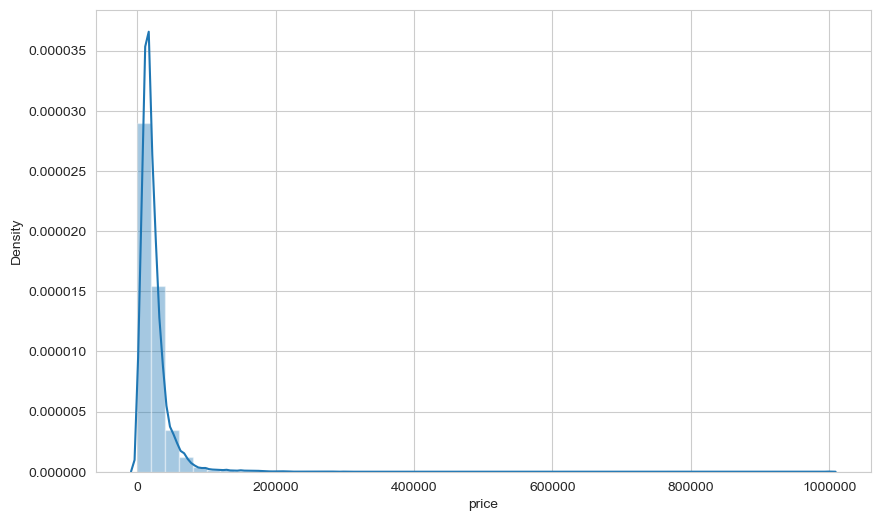

In [43]:
sns.distplot(df.price)

plt.ticklabel_format(style='plain');

Statistical Calculations :
--------------------------
Minimum: 490.00
Mean:  23470.66
Median:17979.00
Mode:  14990.00
Maximum:999999.00



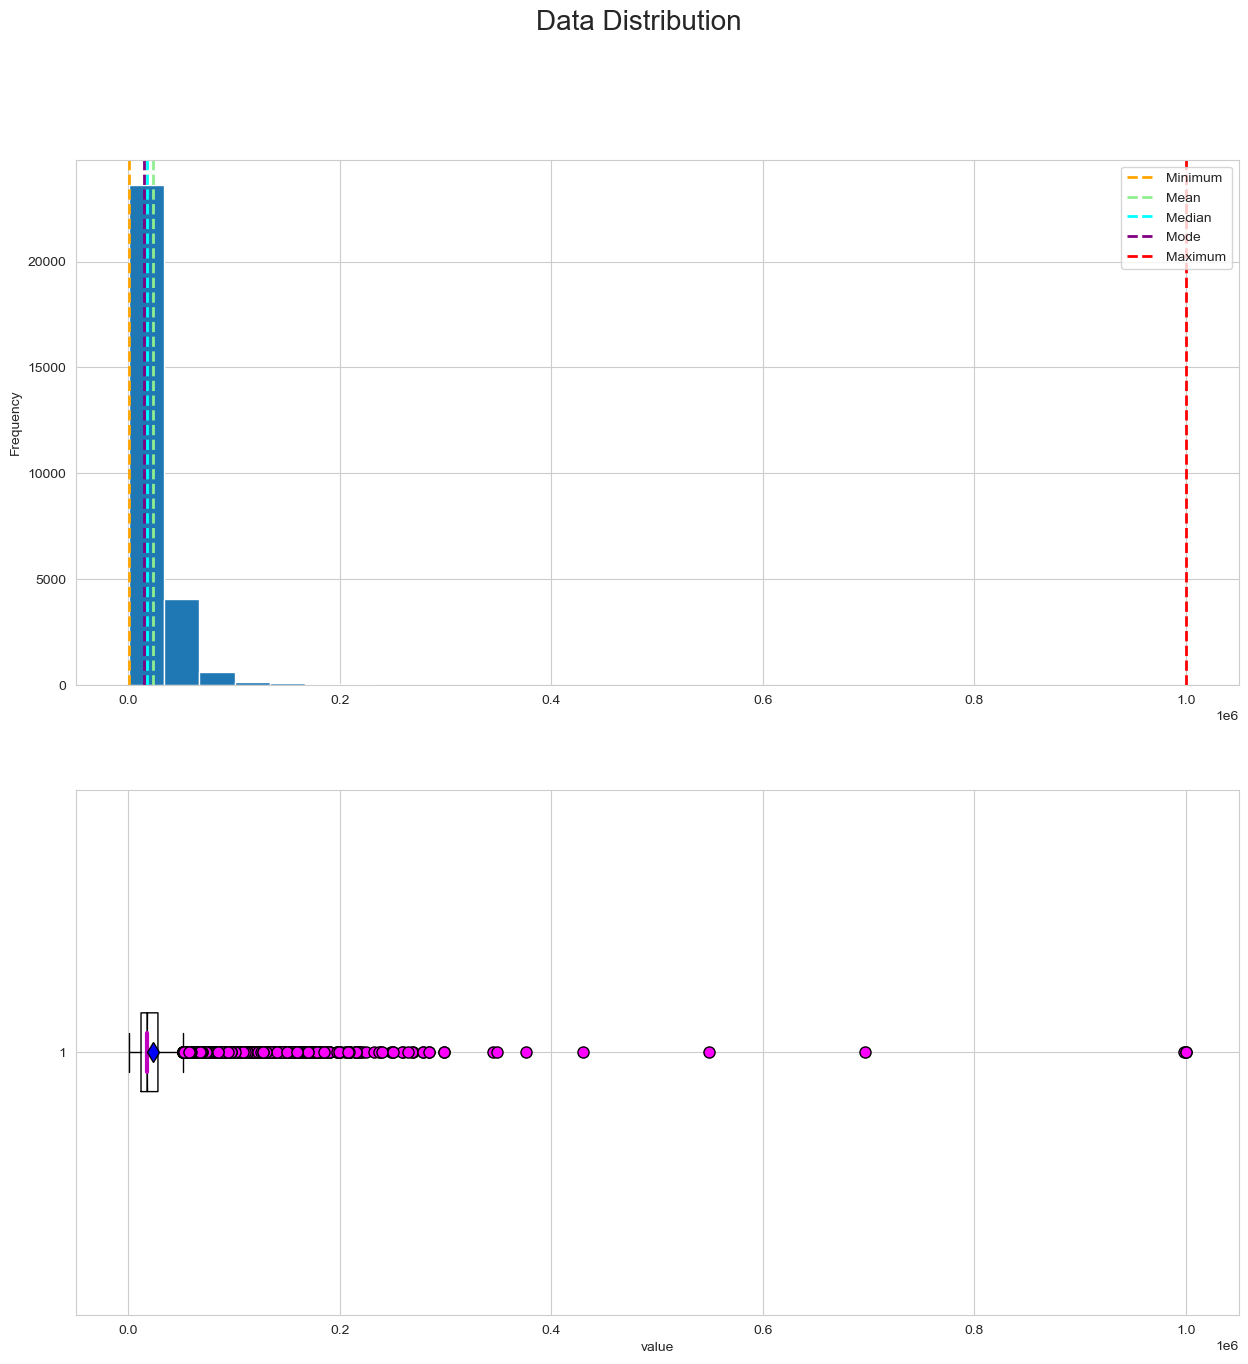

In [44]:
show_distribution(df["price"])

## make_model

### 📝 Some Remarks on car model & make:

Of the basic factors influencing your car value are the make and model since some vehicles are more likely to sell than others, there are some automobile models that also have a better reputation for durability and other aspects, making them ideal options for those wanting to buy a used car, for example, Japanese models tend to have a better reputation for resale than German models, but of course, it is not in all cases.

The supply and demand of some models is another factor to consider, and, for example, if there are a lot of cars of the same brand and model as yours entering the used car market, this will also affect the price due to the offer and demand.

In [45]:
first_looking("make_model")

column name    :  make_model
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  611
--------------------------------
Renault Megane     863
SEAT Leon          787
Volvo V40          740
Dacia Sandero      730
Hyundai i30        706
                  ... 
Toyota GR86          1
Toyota Tacoma        1
Toyota Tundra        1
Toyota 4-Runner      1
Volvo 244            1
Name: make_model, Length: 611, dtype: int64


**As seen, the "make_model" column gives us a more detailed information for our analysis so after the examination of the following columns, "Make" & "Model", we will decide which one/s we will continue.**

In [46]:
# df.make_model.str.contains('Volvo', regex=False)

# df[df.make_model.str.contains('Volvo', regex=False, na=False)]

## make

In [47]:
first_looking("make")

column name    :  make
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  13
--------------------------------
\nVolvo\n            3659
\nMercedes-Benz\n    2398
\nOpel\n             2385
\nPeugeot\n          2360
\nRenault\n          2351
\nFiat\n             2338
\nFord\n             2324
\nNissan\n           2064
\nToyota\n           2038
\nHyundai\n          1867
\nSEAT\n             1743
\nSkoda\n            1566
\nDacia\n            1537
Name: make, dtype: int64


In [48]:
df["make"] = df.make.str.strip('\n')

In [49]:
df.make.value_counts(dropna=False)

Volvo            3659
Mercedes-Benz    2398
Opel             2385
Peugeot          2360
Renault          2351
Fiat             2338
Ford             2324
Nissan           2064
Toyota           2038
Hyundai          1867
SEAT             1743
Skoda            1566
Dacia            1537
Name: make, dtype: int64

## model

In [50]:
first_looking("model")

column name    :  model
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  594
--------------------------------
[\n, Megane ,\n]        863
[\n, Leon ,\n]          787
[\n, V40 ,\n]           740
[\n, Sandero ,\n]       730
[\n, i30 ,\n]           706
                       ... 
[\n, GLA 35 AMG ,\n]      1
[\n, G 55 AMG ,\n]        1
[\n, Ariya ,\n]           1
[\n, 105 ,\n]             1
[\n, 244 ,\n]             1
Name: model, Length: 594, dtype: int64


In [51]:
# df["model"].str[0]
# df['model'].astype(str).str.extract('([A-Z]+.\d+)')
# df['model'].astype(str).str.extract('( \D+.\d+)')

df['model'] = df['model'].explode().str.strip("\n, ")
df['model']

0           A 160
1         EQE 350
2        A 45 AMG
3        A 35 AMG
4        A 45 AMG
           ...   
29474         S90
29475         S40
29476         C30
29477         S90
29478         S80
Name: model, Length: 28630, dtype: object

In [52]:
df.model.value_counts(dropna=False)

Megane        863
Leon          787
V40           740
Sandero       730
i30           706
             ... 
GLA 35 AMG      1
G 55 AMG        1
Ariya           1
105             1
244             1
Name: model, Length: 594, dtype: int64

In [53]:
df[['make_model', 'make', 'model']].sample(20)

,make_model,make,model
20522,Nissan Terrano,Nissan,Terrano
28763,Volvo V90,Volvo,V90
15294,Skoda Scala,Skoda,Scala
17009,Toyota Yaris,Toyota,Yaris
3960,Opel Crossland X,Opel,Crossland X
24072,Hyundai ELANTRA,Hyundai,ELANTRA
4430,Opel Insignia,Opel,Insignia
25233,Hyundai i30,Hyundai,i30
15685,Dacia Sandero,Dacia,Sandero
22409,Ford Mustang,Ford,Mustang


In [54]:
display(df["make_model"].nunique())
display(df["make"].nunique())
display(df["model"].nunique())
display(df.groupby("make")["model"].nunique().to_frame())

611

13

594

,model
make,
Dacia,9
Fiat,45
Ford,44
Hyundai,35
Mercedes-Benz,205
Nissan,46
Opel,40
Peugeot,39
Renault,45


In [55]:
# df.drop(["make"], axis=1, inplace=True)
df.drop(["model"], axis=1, inplace=True)

In [56]:
df.shape

(28630, 45)

**After the examination, we have decided to drop the columns, "make" & "model" and kept the column of "make_model.**

## short_description

In [57]:
first_looking("short_description")

column name    :  short_description
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  20947
--------------------------------
                                                      213
D2 Momentum 120                                        88
D2 Kinetic 120                                         87
Cabrio 1.4T S&S Excellence                             85
Extreme+ 7-Sitzer TCe 110                              57
                                                     ... 
PureTech  EAT8 Allure Pack...DISP. PER NOLEGGIO         1
BlueHDi 130 S&S EAT8 Business                           1
2.0 BlueHDi 180ch S\u0026S GT Line EAT8                 1
1.2 PureTech Première AUT. NAVI PANO                    1
2.9 Executive G. NETTE AUTO! LEER! NAVI! CRUISE! L      1
Name: short_description, Length: 20947, dtype: int64


In [58]:
df.drop("short_description", axis=1, inplace=True)

In [59]:
df.shape

(28630, 44)

## desc

In [60]:
first_looking("desc")

column name    :  desc
--------------------------------
per_of_nulls   :  % 2.04
num_of_nulls   :  583
num_of_uniques :  23242
--------------------------------
NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [61]:
df.shape

(28630, 44)

In [62]:
df.drop("desc", axis=1, inplace=True)

In [63]:
df.shape

(28630, 43)

## location

In [64]:
first_looking("location")

column name    :  location
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  8181
--------------------------------
Av. Laboral, 10,  28021 MADRID, ES                          306
Luckenwalder Berg 5,  14913 Jüterbog, DE                    170
Ctra. del Mig, 96,,  08097 L'Hospitalet de Llobregat, ES    146
9 boulevard Jules Ferry,  75011 Paris, FR                   142
Neuenhofstr. 77,  52078 Aachen, DE                          135
                                                           ... 
2727CT ZOETERMEER, NL                                         1
Rosendaalsestraat 437-439,  6824 CK ARNHEM, NL                1
5751VH DEURNE, NL                                             1
00148 roma, IT                                                1
Sur rendez-vous,  5060 Sambreville, BE                        1
Name: location, Length: 8181, dtype: int64


In [65]:
df.location

0        P.I. EL PALMAR C/FORJA 6,  11500 PUERTO DE SAN...
1             APARTADO DE CORREOS 1032,  26140 LOGROÑO, ES
2        PORT. TARRACO, MOLL DE LLEVANT, Nº 5, LOC. 6-8...
3        Carrer de Provença, 31 Local,  8029 BARCELONA, ES
4                   CARRIL ARAGONES 4,  30007 CASILLAS, ES
                               ...                        
29474             HERMANOS LUMIERE Nº16,  29004 MALAGA, ES
29475                    Stobbeweg 6,  2461 EX TER AAR, NL
29476               Sur rendez-vous,  5060 Sambreville, BE
29477      Bergambachterstraat 5,  2871 JB SCHOONHOVEN, NL
29478                    Lage Ham 106,  5102 AE DONGEN, NL
Name: location, Length: 28630, dtype: object

### Location feature will be kept for finding the answers of some analytical questions, rather than machine learning modelling.

## body_type

Vehicle class and body type affect resale value for multiple reasons. One critical factor is geography. Sports cars and convertibles sell better in warm climates, where they’re practical throughout the year. Rugged SUVs and four-wheel-drive vehicles are more popular in colder climates and areas with rougher terrain.

In [66]:
first_looking("body_type")

column name    :  body_type
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  6
--------------------------------
[\n, Station wagon, \n]       5448
[\n, Off-Road/Pick-up, \n]    5415
[\n, Compact, \n]             5387
[\n, Sedan, \n]               5043
[\n, Coupe, \n]               4009
[\n, Convertible, \n]         3328
Name: body_type, dtype: int64


In [67]:
# df["body_type"].str[0]
# df['body_type'].astype(str).str.extract('([A-Z]+.\d+)')
# df['body_type'].astype(str).str.extract('( \D+.\d+)')

df['body_type'] = df['body_type'].explode().str.strip("\n, ")
df['body_type']

0        Compact
1        Compact
2        Compact
3        Compact
4        Compact
          ...   
29474      Sedan
29475      Sedan
29476      Sedan
29477      Sedan
29478      Sedan
Name: body_type, Length: 28630, dtype: object

In [68]:
df["body_type"].value_counts(dropna=False)

Station wagon       5448
Off-Road/Pick-up    5415
Compact             5387
Sedan               5043
Coupe               4009
Convertible         3328
Name: body_type, dtype: int64

## type

An ex-demo car is a ex-demonstration unit that are typically test driven by potential customers at the showroom. In the process, the car would have clocked up some mileage. An ex-demo car, depending on how you look at it, can be quite a bargain when shopping for a car. After all, on paper at least, it offers quite a lot of savings compared to a brand-new car. More than often, ex-demo cars are top-spec models as dealers want to persuade customers to get the highest variant possible. Compared to a typical used car, getting an ex-demo car is way more straightforward and transparent, but no where as hassle-free as buying new.

A company/employee car is a vehicle provided by the business for both business and private use of an employee who usually is required to travel extensively for their role, for example, a regional sales manager. Due to its nature, this kind of cars will be driven by their owners and have more mileage than others. This is probably the most important factor in a resale. Greater the mileage, more the car has been used; hence higher wear and tear and impact on the engine. A lower reading on the odometer will always command a higher price.

In [69]:
first_looking("type")

column name    :  type
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  4
--------------------------------
[\n, Used, \n]              25251
[\n, Demonstration, \n]      1433
[\n, Pre-registered, \n]     1377
[\n, Employee's car, \n]      569
Name: type, dtype: int64


In [70]:
df['type'] = df['type'].explode().str.strip("\n, ")
df['type']

0                  Used
1        Pre-registered
2                  Used
3                  Used
4                  Used
              ...      
29474              Used
29475              Used
29476              Used
29477              Used
29478              Used
Name: type, Length: 28630, dtype: object

In [71]:
df.type.value_counts(dropna=False)

Used              25251
Demonstration      1433
Pre-registered     1377
Employee's car      569
Name: type, dtype: int64

## doors

In [72]:
first_looking("doors")

column name    :  doors
--------------------------------
per_of_nulls   :  % 1.25
num_of_nulls   :  359
num_of_uniques :  7
--------------------------------
[\n, 5, \n]    17481
[\n, 2, \n]     5523
[\n, 4, \n]     3001
[\n, 3, \n]     2259
NaN              359
[\n, 6, \n]        5
[\n, 1, \n]        2
Name: doors, dtype: int64


In [73]:
df['doors'] = df['doors'].explode().str.strip("\n, ")
df['doors'] = pd.to_numeric(df['doors'])
df['doors']

0       5.00
1       4.00
2       5.00
3       5.00
4       5.00
        ... 
29474   4.00
29475   4.00
29476   3.00
29477   4.00
29478   4.00
Name: doors, Length: 28630, dtype: float64

In [74]:
df.doors.value_counts(dropna=False)

5.00    17481
2.00     5523
4.00     3001
3.00     2259
NaN       359
6.00        5
1.00        2
Name: doors, dtype: int64

## country_version

In [75]:
first_looking("country_version")

column name    :  country_version
--------------------------------
per_of_nulls   :  % 41.01
num_of_nulls   :  11741
num_of_uniques :  26
--------------------------------
NaN                         11741
[\n, Germany, \n]            7939
[\n, Spain, \n]              6376
[\n, Italy, \n]               679
[\n, Belgium, \n]             641
[\n, European Union, \n]      340
[\n, Netherlands, \n]         306
[\n, Austria, \n]             266
[\n, France, \n]              101
[\n, United States, \n]        57
[\n, Czechia, \n]              47
[\n, Poland, \n]               31
[\n, Hungary, \n]              21
[\n, Denmark, \n]              21
[\n, Romania, \n]              12
[\n, Japan, \n]                12
[\n, Switzerland, \n]           9
[\n, Luxembourg, \n]            9
[\n, Sweden, \n]                6
[\n, Slovenia, \n]              5
[\n, Slovakia, \n]              4
[\n, Croatia, \n]               3
[\n, Bulgaria, \n]              1
[\n, Malta, \n]                 1
[\n, Canada, 

In [76]:
df["country_version"] = df["country_version"].apply(lambda item: item[0] if type(item) == list else item)\
                                             .str.strip("\n, ")
df["country_version"]

0          Spain
1          Spain
2          Spain
3          Spain
4          Spain
          ...   
29474      Spain
29475        NaN
29476    Belgium
29477        NaN
29478        NaN
Name: country_version, Length: 28630, dtype: object

In [77]:
df["country_version"].value_counts(dropna=False)

NaN               11741
Germany            7939
Spain              6376
Italy               679
Belgium             641
European Union      340
Netherlands         306
Austria             266
France              101
United States        57
Czechia              47
Poland               31
Hungary              21
Denmark              21
Romania              12
Japan                12
Switzerland           9
Luxembourg            9
Sweden                6
Slovenia              5
Slovakia              4
Croatia               3
Bulgaria              1
Malta                 1
Canada                1
Mexico                1
Name: country_version, dtype: int64

In [78]:
df.shape

(28630, 43)

In [79]:
df.drop("country_version", axis=1, inplace=True)

In [80]:
df.shape

(28630, 42)

## offer_number

In [81]:
first_looking("offer_number")

column name    :  offer_number
--------------------------------
per_of_nulls   :  % 19.32
num_of_nulls   :  5530
num_of_uniques :  20946
--------------------------------
NaN                                5530
[\n, 1, \n]                          28
[\n, L-Vorlauf 2023, \n]             10
[\n, 30, \n]                          9
[\n, 20, \n]                          9
                                   ... 
[\n, ggp-EP-880-ZS, \n]               1
[\n, 7475319, \n]                     1
[\n, abci-EZ-260-PS_130291, \n]       1
[\n, 7407611, \n]                     1
[\n, 43-JR-LR, \n]                    1
Name: offer_number, Length: 20946, dtype: int64


In [82]:
df.shape

(28630, 42)

In [83]:
df.drop("offer_number", axis=1, inplace=True)

In [84]:
df.shape

(28630, 41)

## warranty

In [85]:
first_looking("warranty")

column name    :  warranty
--------------------------------
per_of_nulls   :  % 44.87
num_of_nulls   :  12846
num_of_uniques :  66
--------------------------------
NaN                     12846
[\n, 12 months, \n]      9545
[\n, Yes, \n]            2319
[\n, 24 months, \n]      1515
[\n, 60 months, \n]       968
[\n, 6 months, \n]        398
[\n, 36 months, \n]       257
[\n, 3 months, \n]        185
[\n, 0 months, \n]        133
[\n, 48 months, \n]        78
[\n, 84 months, \n]        47
[\n, 72 months, \n]        40
[\n, 13 months, \n]        22
[\n, 8 months, \n]         19
[\n, 18 months, \n]        15
[\n, 1 months, \n]         15
[\n, 15 months, \n]        13
[\n, 14 months, \n]        13
[\n, 16 months, \n]        13
[\n, 30 months, \n]        12
[\n, 34 months, \n]        11
[\n, 21 months, \n]        11
[\n, 33 months, \n]        11
[\n, 32 months, \n]         9
[\n, 20 months, \n]         9
[\n, 23 months, \n]         9
[\n, 19 months, \n]         9
[\n, 17 months, \n]       

In [86]:
df["warranty"] = df.warranty.apply(lambda x : x[0] if type(x)==list else x)

df["warranty"] = df.warranty.str.extract('(\d{1,4})').astype("float") # str.extract('(\d+)')
df["warranty"]

0       24.00
1       24.00
2       12.00
3       12.00
4       12.00
         ... 
29474   12.00
29475     NaN
29476   13.00
29477   12.00
29478     NaN
Name: warranty, Length: 28630, dtype: float64

In [87]:
df.warranty.value_counts(dropna=False)

NaN       15165
12.00      9545
24.00      1515
60.00       968
6.00        398
36.00       257
3.00        185
0.00        133
48.00        78
84.00        47
72.00        40
13.00        22
8.00         19
18.00        15
1.00         15
15.00        13
14.00        13
16.00        13
30.00        12
34.00        11
21.00        11
33.00        11
32.00         9
20.00         9
23.00         9
19.00         9
17.00         9
35.00         8
28.00         8
50.00         6
22.00         6
42.00         5
31.00         4
26.00         4
52.00         4
47.00         4
9.00          4
25.00         3
58.00         3
11.00         3
27.00         3
45.00         2
53.00         2
10.00         2
57.00         2
51.00         2
29.00         2
2.00          2
80.00         2
90.00         2
7.00          2
46.00         1
117.00        1
43.00         1
65.00         1
39.00         1
142.00        1
110.00        1
37.00         1
49.00         1
55.00         1
99.00         1
122.00  

## mileage

### 📝 Some Remarks on mileage:

Actual kilometer on the cars is one of the most important factors which one may think that there is negative linear correlation between the price and the kilometers of the car. 

Cars stack, on average, 10,000-15,000 kms in mileage, each year. The more miles your car has been driven, the lower its market value will get generally. Cars with higher mileage on the odometer tend to be exposed to greater wear and tear, and are more likely to require a greater focus on maintenance and repairs. Mileage is also a key ranking factor for prospective used car buyers – the general rule of thumb being that a car with lower miles is viewed more favourably by buyers. 

In [88]:
first_looking("mileage")

column name    :  mileage
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  1
num_of_uniques :  14184
--------------------------------
10 km         586
1 km          172
50 km         133
100 km        119
5,000 km      118
             ... 
141,589 km      1
59,821 km       1
123,500 km      1
29,781 km       1
230,047 km      1
Name: mileage, Length: 14184, dtype: int64


In [89]:
# df.mileage.str.replace(',', '').str.rstrip(" km").replace('-', np.nan).astype('float')


df["mileage"] = df.mileage.str.replace(',', '').str.extract('(\d{1,8})').astype('float')
df["mileage"]

0       120200.00
1         5000.00
2        18900.00
3        18995.00
4       197000.00
           ...   
29474    40345.00
29475   145000.00
29476    96000.00
29477    94343.00
29478   230047.00
Name: mileage, Length: 28630, dtype: float64

In [90]:
df.mileage.value_counts(dropna=False)

10.00        586
1.00         172
50.00        133
100.00       119
5000.00      118
            ... 
141589.00      1
59821.00       1
123500.00      1
29781.00       1
230047.00      1
Name: mileage, Length: 14184, dtype: int64

## first_registration

In [91]:
first_looking("first_registration")

column name    :  first_registration
--------------------------------
per_of_nulls   :  % 0.01
num_of_nulls   :  2
num_of_uniques :  656
--------------------------------
08/2022    454
06/2022    428
05/2019    420
06/2019    418
07/2019    416
          ... 
06/1967      1
06/1980      1
09/1970      1
06/1963      1
10/1979      1
Name: first_registration, Length: 656, dtype: int64


In [92]:
df['first_registration'].str.extract('.*(\d{4})', expand=False)

0        2016
1        2022
2        2020
3        2020
4        2015
         ... 
29474    2019
29475    2004
29476    2011
29477    2017
29478    2002
Name: first_registration, Length: 28630, dtype: object

In [93]:
# df['first_registration'].map(lambda x: str(x)[-4:])
# df.apply(lambda x: str(x['first_registration'])[-4:], axis=1)
# [x.strip()[-4:] for x in df['first_registration'].astype(str)]
# df['first_registration'].astype(str).str.findall("(\w{4})").str.join("")
# df['first_registration'].astype(str).str.extract("(\w{4})")
# df['first_registration'].str.extract('.*(\d{4})', expand=False)
# df['first_registration'].get(1).extract("(\w{4})")

df['first_registration'].str[-4:]

0        2016
1        2022
2        2020
3        2020
4        2015
         ... 
29474    2019
29475    2004
29476    2011
29477    2017
29478    2002
Name: first_registration, Length: 28630, dtype: object

In [94]:
df['first_registration'] = df['first_registration'].str[-4:].astype('float')
df['first_registration']

0       2016.00
1       2022.00
2       2020.00
3       2020.00
4       2015.00
          ...  
29474   2019.00
29475   2004.00
29476   2011.00
29477   2017.00
29478   2002.00
Name: first_registration, Length: 28630, dtype: float64

In [95]:
df["first_registration"].value_counts(dropna=False)

2019.00    3667
2018.00    3492
2022.00    3086
2021.00    2870
2020.00    2473
2017.00    2426
2016.00    1486
2015.00    1237
2014.00     936
2013.00     703
2012.00     655
2011.00     642
2010.00     559
2007.00     492
2008.00     441
2009.00     424
2006.00     395
2005.00     287
2004.00     247
2003.00     211
2001.00     191
2002.00     187
2000.00     160
1999.00     144
1998.00      91
1997.00      81
1994.00      80
1995.00      78
1996.00      71
1991.00      62
1992.00      60
1993.00      55
1990.00      54
1966.00      41
1967.00      34
1988.00      33
1965.00      32
1973.00      29
1972.00      29
1968.00      27
1987.00      26
1978.00      23
1986.00      22
1989.00      20
1970.00      19
1971.00      18
1985.00      18
1969.00      17
1979.00      17
1983.00      16
1975.00      14
1977.00      13
1964.00      11
1976.00      11
1982.00      11
1984.00      10
1981.00       9
1963.00       9
1974.00       9
1962.00       8
1961.00       7
1980.00       6
1955.00 

## production_date

In [96]:
first_looking("production_date")

column name    :  production_date
--------------------------------
per_of_nulls   :  % 79.36
num_of_nulls   :  22722
num_of_uniques :  50
--------------------------------
NaN        22722
2019.00     1179
2021.00      980
2022.00      894
2020.00      763
2018.00      762
2017.00      391
2016.00      239
2015.00      118
2014.00       90
2013.00       76
2010.00       53
2012.00       43
2011.00       43
2008.00       34
2009.00       26
2007.00       20
2006.00       17
2002.00       15
2004.00       13
2003.00       13
1967.00       12
2001.00       12
1966.00       11
1999.00        9
2005.00        9
1965.00        9
1970.00        9
1997.00        8
1994.00        8
1968.00        7
2000.00        7
1998.00        5
1990.00        3
1973.00        3
1987.00        3
1993.00        3
1991.00        3
1996.00        3
1995.00        2
1969.00        2
1978.00        2
1982.00        2
1961.00        1
1954.00        1
1988.00        1
1962.00        1
1981.00        1
1985.00      

In [97]:
df[(df["first_registration"].notnull()) &\
   (df["production_date"].notnull()) &\
   (df["first_registration"]!=df["production_date"])]\
    [["first_registration","production_date"]]

,first_registration,production_date
23,2019.00,2018.00
30,2020.00,2018.00
31,2020.00,2019.00
470,2022.00,2021.00
472,2019.00,2016.00
...,...,...
29350,2019.00,2017.00
29380,2022.00,2021.00
29414,2022.00,2021.00
29426,2020.00,2019.00


## Feature Engineering for "Age" Column

### ⚠️ Why do we need a new feature named "age"❓

Car age is perhaps the biggest factor in deciding the price of a second-hand car. Most probably new cars in the world lose their value fairly quickly in the initial years of usage. Unless your car is a prized vintage, you will realize that the relation between the car price and its age are inversely proportional.

Unless it is a vintage, the older the car, the lower the resale price. The reason is fairly simple – every car has a lifetime. And the closer it is to the end of its life, the lower the price.

In [98]:
# The data used for this project were scraped in 2022.

df['age'] = 2022 - df['first_registration']
df['age']

0        6.00
1        0.00
2        2.00
3        2.00
4        7.00
         ... 
29474    3.00
29475   18.00
29476   11.00
29477    5.00
29478   20.00
Name: age, Length: 28630, dtype: float64

In [99]:
df.age.value_counts(dropna=False)

3.00       3667
4.00       3492
0.00       3086
1.00       2870
2.00       2473
5.00       2426
6.00       1486
7.00       1237
8.00        936
9.00        703
10.00       655
11.00       642
12.00       559
15.00       492
14.00       441
13.00       424
16.00       395
17.00       287
18.00       247
19.00       211
21.00       191
20.00       187
22.00       160
23.00       144
24.00        91
25.00        81
28.00        80
27.00        78
26.00        71
31.00        62
30.00        60
29.00        55
32.00        54
56.00        41
55.00        34
34.00        33
57.00        32
49.00        29
50.00        29
54.00        27
35.00        26
44.00        23
36.00        22
33.00        20
52.00        19
51.00        18
37.00        18
53.00        17
43.00        17
39.00        16
47.00        14
45.00        13
58.00        11
46.00        11
40.00        11
38.00        10
41.00         9
59.00         9
48.00         9
60.00         8
61.00         7
42.00         6
67.00   

In [100]:
df.drop(["first_registration", "production_date"], axis=1, inplace=True)

In [101]:
df.shape

(28630, 40)

## gearbox

### 📝 Some Remarks on transmission type: 

Though manual transmissions (stick shifts) have historically been slightly more fuel-efficient than automatic transmissions, they’re usually detrimental to resale value in some cultures. That’s because most drivers don’t know how to drive stick, have mobility issues that make shifting painful or difficult, or simply don’t like keeping their right hands and left feet in constant motion in stop-and-go traffic.

In [102]:
first_looking("gearbox")

column name    :  gearbox
--------------------------------
per_of_nulls   :  % 0.87
num_of_nulls   :  248
num_of_uniques :  4
--------------------------------
[\nManual\n]            17023
[\nAutomatic\n]         11287
NaN                       248
[\nSemi-automatic\n]       72
Name: gearbox, dtype: int64


In [103]:
# df["gearbox"].apply(lambda item: item[0] if type(item) == list else item).str.split('\n').str[1].str.strip()
# df['gearbox'].astype(str).str.strip("['\\n\\n']")
# df['gearbox'].explode().str.strip("\n ")

df['gearbox'] = df['gearbox'].astype(str).str.strip("['\\n, \\n']").str.extract("(\D+)")
df['gearbox']

0           Manual
1        Automatic
2        Automatic
3        Automatic
4        Automatic
           ...    
29474    Automatic
29475    Automatic
29476       Manual
29477    Automatic
29478    Automatic
Name: gearbox, Length: 28630, dtype: object

In [104]:
df.gearbox.value_counts(dropna=False)

Manual            17023
Automatic         11287
a                   248
Semi-automatic       72
Name: gearbox, dtype: int64

In [105]:
df['gearbox'].replace('a', np.nan, inplace=True)

In [106]:
df.gearbox.value_counts(dropna=False)

Manual            17023
Automatic         11287
NaN                 248
Semi-automatic       72
Name: gearbox, dtype: int64

## power

In [107]:
first_looking("power")

column name    :  power
--------------------------------
per_of_nulls   :  % 2.0
num_of_nulls   :  572
num_of_uniques :  352
--------------------------------
[\n110 kW (150 hp)\n]      1992
[\n96 kW (131 hp)\n]       1356
[\n88 kW (120 hp)\n]       1182
[\n81 kW (110 hp)\n]       1166
[\n66 kW (90 hp)\n]        1110
                           ... 
[\n746 kW (1,014 hp)\n]       1
[\n570 kW (775 hp)\n]         1
[\n471 kW (640 hp)\n]         1
[\n179 kW (243 hp)\n]         1
[\n26 kW (35 hp)\n]           1
Name: power, Length: 352, dtype: int64


In [108]:
df[['power_kW', 'power_hp']] = df["power"].apply(lambda item: item[0] if type(item) == list else item)\
                              .str.extract(r'\D*(?P<kW>\d+)\D+(?P<hp>\d+)').astype(float)
df.head(3)

,make_model,make,location,price,body_type,type,doors,warranty,mileage,gearbox,fuel_type,colour,paint,seller,seats,power,engine_size,gears,co_emissions,manufacturer_colour,drivetrain,cylinders,fuel_consumption,comfort_&_convenience,entertainment_&_media,safety_&_security,extras,empty_weight,model_code,general_inspection,full_service_history,non_smoker_vehicle,emission_class,emissions_sticker,upholstery_colour,upholstery,previous_owner,energy_efficiency_class,co_efficiency,age,power_kW,power_hp
0,Mercedes-Benz A 160,Mercedes-Benz,"P.I. EL PALMAR C/FORJA 6, 11500 PUERTO DE SAN...",16950.00,Compact,Used,5.00,24.00,120200.00,Manual,Diesel,Black,Metallic,Dealer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.00,NaN,NaN
1,Mercedes-Benz EQE 350,Mercedes-Benz,"APARTADO DE CORREOS 1032, 26140 LOGROÑO, ES",80900.00,Compact,Pre-registered,4.00,24.00,5000.00,Automatic,Electric,NaN,NaN,Dealer,"[\n, 5, \n]",[\n215 kW (292 hp)\n],[\n1 cc\n],[\n9\n],0 g/km (comb.),Negro Obsidiana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,215.00,292.00
2,Mercedes-Benz A 45 AMG,Mercedes-Benz,"PORT. TARRACO, MOLL DE LLEVANT, Nº 5, LOC. 6-8...",69900.00,Compact,Used,5.00,12.00,18900.00,Automatic,Gasoline,Grey,NaN,Dealer,"[\n, 5, \n]",[\n310 kW (421 hp)\n],"[\n1,991 cc\n]",[\n8\n],NaN,Mountaingrau magno,"[\n, 4WD, \n]",[\n4\n],"[[8.4 l/100 km (comb.)], [10.9 l/100 km (city)...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.00,310.00,421.00


In [109]:
df.power_kW.value_counts(dropna=False)

110.00    1992
96.00     1356
88.00     1182
81.00     1166
66.00     1110
          ... 
746.00       1
570.00       1
471.00       1
179.00       1
26.00        1
Name: power_kW, Length: 352, dtype: int64

In [110]:
df.power_hp.value_counts(dropna=False)

150.00    1992
131.00    1356
120.00    1182
110.00    1166
90.00     1110
          ... 
465.00       1
412.00       1
670.00       1
506.00       1
33.00        1
Name: power_hp, Length: 348, dtype: int64

In [111]:
df.shape

(28630, 42)

In [112]:
df.drop('power', axis=1, inplace=True)

In [113]:
df.shape

(28630, 41)

## fuel_type

Another key factor affecting used car prices is fuel economy. Efficient vehicles tend to hold their value better when gas prices are high, while less efficient vehicles (which typically have more cargo space and higher safety ratings) do better when gas is cheap.

In [114]:
first_looking("fuel_type")

column name    :  fuel_type
--------------------------------
per_of_nulls   :  % 6.24
num_of_nulls   :  1787
num_of_uniques :  47
--------------------------------
Gasoline                                                                                              8532
Diesel                                                                                                5911
Super 95                                                                                              3557
Diesel (Particle filter)                                                                              2816
Regular/Benzine 91                                                                                    2065
NaN                                                                                                   1787
Super E10 95                                                                                          1016
Regular/Benzine 91 (Particle filter)                                                    

In [115]:
df["fuel_type"].str.split("/").value_counts(dropna=False)

[Gasoline]                                                                                                    8532
[Diesel]                                                                                                      5911
[Super 95]                                                                                                    3557
[Diesel (Particle filter)]                                                                                    2816
[Regular, Benzine 91]                                                                                         2065
NaN                                                                                                           1787
[Super E10 95]                                                                                                1016
[Regular, Benzine 91 (Particle filter)]                                                                        555
[Super 95 (Particle filter)]                                                    

In [116]:
df["fuel_type"] = df["fuel_type"].str.split("/").str[0].str.strip()
df["fuel_type"]

0                          Diesel
1                        Electric
2                        Gasoline
3                        Gasoline
4                          Diesel
                   ...           
29474                         NaN
29475                    Gasoline
29476    Diesel (Particle filter)
29477                    Gasoline
29478                    Super 95
Name: fuel_type, Length: 28630, dtype: object

In [117]:
df["fuel_type"] = df["fuel_type"].str.split("(").str[0].str.strip()
df["fuel_type"]

0          Diesel
1        Electric
2        Gasoline
3        Gasoline
4          Diesel
           ...   
29474         NaN
29475    Gasoline
29476      Diesel
29477    Gasoline
29478    Super 95
Name: fuel_type, Length: 28630, dtype: object

In [118]:
df['fuel_type'].value_counts(dropna=False)

Gasoline                8728
Diesel                  8727
Super 95                4097
Regular                 2906
NaN                     1787
Super E10 95            1340
Others                   213
Electric                 188
Super Plus 98            185
Liquid petroleum gas     165
CNG                       95
Super Plus E10 98         77
LPG                       77
Domestic gas H            25
Domestic gas L            13
Ethanol                    3
Hydrogen                   3
Biogas                     1
Name: fuel_type, dtype: int64

In [119]:
benzine = ["Gasoline", "Super 95", "Regular", "Super E10 95", "Super Plus 98", "Super Plus E10 98", "Others", "Ethanol"]
petroleum_gas = ["Liquid petroleum gas", "CNG", "LPG", "Domestic gas H", "Domestic gas L", "Biogas", "Hydrogen"]

def fueltype(x):
    if x in benzine:
        return "Benzine"
    elif x in petroleum_gas:
        return "Liquid/Natural Gas"
    else:
        return x

df["fuel_type"] = df["fuel_type"].apply(fueltype)

In [120]:
df['fuel_type'].value_counts(dropna=False)

Benzine               17549
Diesel                 8727
NaN                    1787
Liquid/Natural Gas      379
Electric                188
Name: fuel_type, dtype: int64

## colour

### 📝 Some Remarks on car colour:

Car colour (some cars may have limited edition colours): Popular colours usually garner more attention from potential buyers and therefore are easier to sell. Some cars may come in limited edition colours, which can be difficult to sell; however, these cars usually find a higher than usual price when successfully sold.

In [121]:
first_looking("colour")

column name    :  colour
--------------------------------
per_of_nulls   :  % 6.02
num_of_nulls   :  1724
num_of_uniques :  15
--------------------------------
Black     6473
Grey      5998
White     5185
Blue      3478
Red       2242
NaN       1724
Silver    1622
Green      450
Brown      437
Orange     288
Beige      278
Yellow     230
Violet      98
Bronze      65
Gold        62
Name: colour, dtype: int64


## manufacturer_colour

In [122]:
first_looking("manufacturer_colour")

column name    :  manufacturer_colour
--------------------------------
per_of_nulls   :  % 23.9
num_of_nulls   :  6843
num_of_uniques :  4964
--------------------------------
NaN                               6843
Blanco                            1235
Gris                               671
Azul                               552
Negro                              546
                                  ... 
Colore esterno (snowflake whit       1
Pompeigraumetallic                   1
Cararragrau                          1
ICE WHITE (wit metallic)             1
Denim Blue metallic (blauw met       1
Name: manufacturer_colour, Length: 4964, dtype: int64


In [123]:
df[['colour', 'manufacturer_colour']].sample(20)

,colour,manufacturer_colour
21903,Silver,NaN
10277,Red,Rosso
21267,White,Blanco
1154,Black,Obsidianschwarz metallic
14035,White,NaN
20676,White,NaN
20775,Blue,NaN
23385,Grey,NaN
22367,White,Oxford white
8587,White,NACARADO


In [124]:
df[(df["colour"].isnull()) & (df["manufacturer_colour"].notnull())][["colour", "manufacturer_colour"]]

,colour,manufacturer_colour
1,NaN,Negro Obsidiana
24,NaN,GRIS GRAFITO
37,NaN,Plata Iridio
145,NaN,Gris Montagne
169,NaN,Bleu denim métallisé
...,...,...
29434,NaN,Blanc Cristal
29439,NaN,Gris Osmium
29440,NaN,Noir Onyx Métallisé
29441,NaN,Gris Osmium


In [125]:
df.shape

(28630, 41)

In [126]:
df.drop(["colour", "manufacturer_colour"], axis=1, inplace=True)

In [127]:
df.shape

(28630, 39)

## paint

In [128]:
first_looking("paint")

column name    :  paint
--------------------------------
per_of_nulls   :  % 49.37
num_of_nulls   :  14135
num_of_uniques :  3
--------------------------------
Metallic     14494
NaN          14135
Uni/basic        1
Name: paint, dtype: int64


In [129]:
# df['Paint'].fillna("Uni/basic")

df['paint'] = df['paint'].replace(np.nan, "Uni/basic", regex=True)
df['paint']

0         Metallic
1        Uni/basic
2        Uni/basic
3        Uni/basic
4         Metallic
           ...    
29474    Uni/basic
29475    Uni/basic
29476     Metallic
29477     Metallic
29478    Uni/basic
Name: paint, Length: 28630, dtype: object

In [130]:
df['paint'].value_counts(dropna=False)

Metallic     14494
Uni/basic    14136
Name: paint, dtype: int64

In [131]:
df.shape

(28630, 39)

In [132]:
df.drop("paint", axis=1, inplace=True)

In [133]:
df.shape

(28630, 38)

## seller

In [134]:
first_looking("seller")

column name    :  seller
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  2
--------------------------------
Dealer            26318
Private seller     2312
Name: seller, dtype: int64


## seats

In [135]:
first_looking("seats")

column name    :  seats
--------------------------------
per_of_nulls   :  % 10.92
num_of_nulls   :  3125
num_of_uniques :  12
--------------------------------
[\n, 5, \n]     18308
[\n, 4, \n]      5390
NaN              3125
[\n, 2, \n]      1186
[\n, 7, \n]       488
[\n, 8, \n]        43
[\n, 9, \n]        35
[\n, 3, \n]        25
[\n, 6, \n]        12
[\n, 0, \n]         9
[\n, 1, \n]         7
[\n, 17, \n]        2
Name: seats, dtype: int64


In [136]:
df["seats"] = df.seats.apply(lambda x : x[0] if type(x)==list else x)

df["seats"] = df.seats.str.extract('(\d{1,4})').astype("float") # str.extract('(\d+)')
df["seats"]

0        NaN
1       5.00
2       5.00
3       5.00
4       5.00
        ... 
29474   4.00
29475   5.00
29476   4.00
29477   5.00
29478   5.00
Name: seats, Length: 28630, dtype: float64

In [137]:
df['seats'].value_counts(dropna=False)

5.00     18308
4.00      5390
NaN       3125
2.00      1186
7.00       488
8.00        43
9.00        35
3.00        25
6.00        12
0.00         9
1.00         7
17.00        2
Name: seats, dtype: int64

## engine_size

🔔 Does the engine capacity affect the price of a vehicle❓

 - A larger engine tends to be more expensive for the manufacturer to build. This cost is usually recovered (plus a nice profit) by increasing the price toward the customer.
 - Many cars will have more equipment standard with the larger engine, equipment that would be chargeable extras when the car is ordered with a smaller engine. The cost of this equipment is added to the base price of the car.
Direct taxation on engine displacement in some places. Some countries or states will calculate taxes directly on the displacement. Even with power, emissions and such identical between a large and a small engine, obsolete and nonsensical rules dictate more tax to be paid on the big one.
 - Indirect taxation on typical side effects of larger engines. Back in the day, a large engine would be more powerful than a small engine, so a tax on horsepower would hit a large engine harder than a small one. Of course, with turbocharging becoming common, a small engine with a turbocharger often has more horsepower than a large engine without a turbocharger, and thus the stronger, smaller engine would be taxed more. These days, emissions-based taxes are more popular, and larger engines tend to have more emissions than smaller engines, triggering higher taxes on the larger engines.

In [138]:
first_looking("engine_size")

column name    :  engine_size
--------------------------------
per_of_nulls   :  % 4.9
num_of_nulls   :  1403
num_of_uniques :  468
--------------------------------
[\n1,598 cc\n]    2099
[\n999 cc\n]      2068
[\n1,969 cc\n]    1929
NaN               1403
[\n1,461 cc\n]    1110
                  ... 
[\n2,753 cc\n]       1
[\n2,495 cc\n]       1
[\n200 cc\n]         1
[\n3,224 cc\n]       1
[\n2,473 cc\n]       1
Name: engine_size, Length: 468, dtype: int64


In [139]:
df['engine_size'] = df['engine_size'].astype(str).str.strip("['\\n, cc\\n']").replace({"a", np.nan})
df['engine_size'] = df['engine_size'].str.replace(',', '').str.extract('(\d+)').astype("float")
df['engine_size']

0           NaN
1          1.00
2       1991.00
3       1991.00
4       2143.00
          ...  
29474   1969.00
29475   2435.00
29476   1560.00
29477   1969.00
29478   2922.00
Name: engine_size, Length: 28630, dtype: float64

In [140]:
df['engine_size'].value_counts(dropna=False)

1598.00    2099
999.00     2068
1969.00    1929
NaN        1403
1461.00    1110
           ... 
2753.00       1
2495.00       1
200.00        1
3224.00       1
2473.00       1
Name: engine_size, Length: 468, dtype: int64

## gears

In [141]:
first_looking("gears")

column name    :  gears
--------------------------------
per_of_nulls   :  % 33.8
num_of_nulls   :  9676
num_of_uniques :  12
--------------------------------
NaN         9676
[\n6\n]     8412
[\n5\n]     5335
[\n7\n]     1738
[\n8\n]     1690
[\n1\n]      712
[\n9\n]      642
[\n4\n]      256
[\n10\n]     112
[\n0\n]       31
[\n3\n]       24
[\n2\n]        2
Name: gears, dtype: int64


In [142]:
df['gears'] = df['gears'].astype(str).str.extract('(\d+)').astype("float")
df['gears']

0        NaN
1       9.00
2       8.00
3       7.00
4       7.00
        ... 
29474   8.00
29475   5.00
29476   6.00
29477   8.00
29478    NaN
Name: gears, Length: 28630, dtype: float64

In [143]:
df["gears"].value_counts(dropna=False)

NaN      9676
6.00     8412
5.00     5335
7.00     1738
8.00     1690
1.00      712
9.00      642
4.00      256
10.00     112
0.00       31
3.00       24
2.00        2
Name: gears, dtype: int64

## co_emissions

In [144]:
first_looking("co_emissions")

column name    :  co_emissions
--------------------------------
per_of_nulls   :  % 35.05
num_of_nulls   :  10036
num_of_uniques :  348
--------------------------------
NaN                  10036
0 g/km (comb.)        1038
119 g/km (comb.)       393
124 g/km (comb.)       340
129 g/km (comb.)       319
                     ...  
7 g/km (comb.)           1
80 g/km (comb.)          1
196  g/km (comb.)        1
100  g/km (comb.)        1
53 g/km (comb.)          1
Name: co_emissions, Length: 348, dtype: int64


In [145]:
df["co_emissions"] = df["co_emissions"].astype(str).str.extract('(\d+)').astype("float")
df["co_emissions"]

0          NaN
1         0.00
2          NaN
3          NaN
4          NaN
         ...  
29474      NaN
29475   217.00
29476    99.00
29477   149.00
29478   251.00
Name: co_emissions, Length: 28630, dtype: float64

In [146]:
df["co_emissions"].value_counts(dropna=False)

NaN       10036
0.00       1040
119.00      393
124.00      340
129.00      319
          ...  
332.00        1
70.00         1
338.00        1
342.00        1
53.00         1
Name: co_emissions, Length: 327, dtype: int64

## drivetrain

A car’s drivetrain includes all of the components necessary to transfer the engine’s energy to its wheels in order to make your vehicle move. A car’s drivetrain connects the engine to the wheels enabling the vehicle to move. As the engine runs, the drivetrain helps send power through the transmission to the drive wheels. The drive wheels can be either the front wheels, rear wheels, or all the wheels — also known as front-wheel, rear-wheel, and all-wheel drive.

An Automotive Drivetrain is a combination of various components that provide power to the vehicle's wheel. It is made up of a driveshaft, transmission or gearbox, universal joints, constant velocity joints, wheels, and axles. It allows the driver to control the power flow and multiplies the engine torque for controlling the engine speed.

Nowadays, the introduction of stringent emission regulations in European and North American countries has boosted demand for improved Automotive drivetrains that are lightweight and hence assist in increasing fuel efficiency, reducing emissions, and improving vehicle performance.

In [147]:
first_looking("drivetrain")

column name    :  drivetrain
--------------------------------
per_of_nulls   :  % 41.0
num_of_nulls   :  11737
num_of_uniques :  4
--------------------------------
[\n, Front, \n]    12066
NaN                11737
[\n, 4WD, \n]       3252
[\n, Rear, \n]      1575
Name: drivetrain, dtype: int64


In [148]:
df["drivetrain"] = df["drivetrain"].explode().str.strip("\n, ")
df["drivetrain"]

0          NaN
1          NaN
2          4WD
3          4WD
4          4WD
         ...  
29474      4WD
29475    Front
29476    Front
29477      NaN
29478    Front
Name: drivetrain, Length: 28630, dtype: object

In [149]:
df["drivetrain"].value_counts(dropna=False)

Front    12066
NaN      11737
4WD       3252
Rear      1575
Name: drivetrain, dtype: int64

## cylinders

In [150]:
first_looking("cylinders")

column name    :  cylinders
--------------------------------
per_of_nulls   :  % 34.15
num_of_nulls   :  9778
num_of_uniques :  13
--------------------------------
[\n4\n]     13068
NaN          9778
[\n3\n]      3258
[\n6\n]      1013
[\n5\n]       799
[\n8\n]       539
[\n2\n]       103
[\n0\n]        35
[\n1\n]        21
[\n12\n]        8
[\n7\n]         6
[\n26\n]        1
[\n16\n]        1
Name: cylinders, dtype: int64


In [151]:
df["cylinders"] = df["cylinders"].astype(str).str.extract('(\d+)').astype("float")
df["cylinders"]

0        NaN
1        NaN
2       4.00
3       4.00
4       4.00
        ... 
29474   4.00
29475   5.00
29476   4.00
29477   4.00
29478   6.00
Name: cylinders, Length: 28630, dtype: float64

In [152]:
df["cylinders"].value_counts(dropna=False)

4.00     13068
NaN       9778
3.00      3258
6.00      1013
5.00       799
8.00       539
2.00       103
0.00        35
1.00        21
12.00        8
7.00         6
26.00        1
16.00        1
Name: cylinders, dtype: int64

## fuel_consumption

### 📝 Some Remarks on fuel consumption:

Another key factor is fuel economy. Efficient vehicles tend to hold their value better when gas prices are high, while less efficient vehicles (which typically have more cargo space and higher safety ratings) do better when gas is cheap.

In [153]:
first_looking("fuel_consumption")

column name    :  fuel_consumption
--------------------------------
per_of_nulls   :  % 18.32
num_of_nulls   :  5245
num_of_uniques :  3453
--------------------------------
NaN                                                                            5245
[[0 l/100 km (comb.)]]                                                          330
[[0 l/100 km (comb.)], [0 l/100 km (city)], [0 l/100 km (country)]]             306
[[3.4 l/100 km (comb.)], [3.7 l/100 km (city)], [3.2 l/100 km (country)]]       170
[[4 l/100 km (comb.)]]                                                          149
                                                                               ... 
[[14.2 l/100 km (comb.)], [21.3 l/100 km (city)], [10 l/100 km (country)]]        1
[[3.5 l/100 km (comb.)], [4.4 l/100 km (city)], [2.9 l/100 km (country)]]         1
[[4.5 l/100 km (comb.)], [6.2 l/100 km (city)], [3.5 l/100 km (country)]]         1
[[4.9 l/100 km (comb.)], [99.9 l/100 km (city)], [98 l/100 km (country)

In [154]:
df["fuel_consumption"].iloc[2]

[['8.4 l/100 km (comb.)'],
 ['10.9 l/100 km (city)'],
 ['5.8 l/100 km (country)']]

In [155]:
df["fuel_consumption"][2][0]

['8.4 l/100 km (comb.)']

In [156]:
df["fuel_consumption"][2][1]

['10.9 l/100 km (city)']

In [157]:
df["fuel_consumption"][2][2]

['5.8 l/100 km (country)']

In [158]:
def cons_avg(x):
    
    if type(x)==list:
        if x[0] != []: return x[0][0]
        else: return None
  
    else:
        return None

In [159]:
def cons_city(x):
    
    if type(x)==list and len(x)==3:
        if x[1] != []: return x[1][0]
        else: return None
        
    else:
        return None

In [160]:
def cons_country(x):
    
    if type(x)==list and len(x)==3:
        if x[2] != []: return x[2][0]
        else: return None
        
    else:
        return None

In [161]:
df['cons_avg'] = df["fuel_consumption"].apply(cons_avg).str.extract('(\d{1,2}.\d|\d{1,3})').astype("float")
df['cons_avg']                                        # str.extract('(\S+)')

0         NaN
1         NaN
2        8.40
3        7.30
4        4.90
         ... 
29474    2.00
29475    9.10
29476    3.80
29477    6.50
29478   10.40
Name: cons_avg, Length: 28630, dtype: float64

In [162]:
df['cons_city'] =  df["fuel_consumption"].apply(cons_city).str.extract('(\d{1,2}.\d|\d{1,3})').astype("float") 
df['cons_city']                                          # str.extract('(\S+)')

0         NaN
1         NaN
2       10.90
3        9.30
4        5.70
         ... 
29474     NaN
29475   13.20
29476    4.30
29477    8.60
29478   15.30
Name: cons_city, Length: 28630, dtype: float64

In [163]:
df['cons_country'] = df["fuel_consumption"].apply(cons_country).str.extract('(\d{1,2}.\d|\d{1,3})').astype("float") 
df['cons_country']                                            # str.extract('(\S+)')

0        NaN
1        NaN
2       5.80
3       6.10
4       4.40
        ... 
29474    NaN
29475   6.70
29476   3.50
29477   5.30
29478   7.60
Name: cons_country, Length: 28630, dtype: float64

In [164]:
df['cons_avg'].value_counts(dropna=False)

NaN      5245
5.00      831
4.90      812
4.50      690
0.00      652
         ... 
16.00       1
57.00       1
61.00       1
14.50       1
44.00       1
Name: cons_avg, Length: 162, dtype: int64

In [165]:
df['cons_city'].value_counts(dropna=False)

NaN      8530
5.80      494
6.40      485
5.30      479
5.70      464
         ... 
21.50       1
50.00       1
3.10        1
79.00       1
76.10       1
Name: cons_city, Length: 196, dtype: int64

In [166]:
df['cons_country'].value_counts(dropna=False)

NaN      8530
4.30      884
4.00      804
4.20      750
4.70      730
         ... 
18.00       1
11.70       1
14.40       1
11.50       1
12.70       1
Name: cons_country, Length: 115, dtype: int64

In [167]:
df.shape

(28630, 41)

In [168]:
df.drop("fuel_consumption", axis=1, inplace=True)

In [169]:
df.shape

(28630, 40)

## empty_weight

In [170]:
first_looking("empty_weight")

column name    :  empty_weight
--------------------------------
per_of_nulls   :  % 37.97
num_of_nulls   :  10872
num_of_uniques :  1219
--------------------------------
NaN               10872
[\n1,395 kg\n]      233
[\n1,055 kg\n]      224
[\n1,423 kg\n]      216
[\n1,165 kg\n]      200
                  ...  
[\n1,877 kg\n]        1
[\n1,011 kg\n]        1
[\n1,069 kg\n]        1
[\n983 kg\n]          1
[\n1,391 kg\n]        1
Name: empty_weight, Length: 1219, dtype: int64


In [171]:
df['empty_weight'].astype(str).str.replace(',', '').str.extract('(\d+)').astype("float")

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,1545.00
...,...
29474,2077.00
29475,1357.00
29476,1356.00
29477,1617.00


In [172]:
df['empty_weight'] = df['empty_weight'].astype(str).str.replace(',', '').str.extract('(\d+)').astype("float")
df['empty_weight']

0           NaN
1           NaN
2           NaN
3           NaN
4       1545.00
          ...  
29474   2077.00
29475   1357.00
29476   1356.00
29477   1617.00
29478   1573.00
Name: empty_weight, Length: 28630, dtype: float64

In [173]:
df['empty_weight'].value_counts(dropna=False)

NaN        10872
1395.00      233
1055.00      224
1423.00      216
1165.00      200
           ...  
1877.00        1
1011.00        1
1069.00        1
983.00         1
1391.00        1
Name: empty_weight, Length: 1219, dtype: int64

## model_code

In [174]:
first_looking("model_code")

column name    :  model_code
--------------------------------
per_of_nulls   :  % 70.78
num_of_nulls   :  20263
num_of_uniques :  2187
--------------------------------
NaN                   20263
[\n, 8212/AFJ, \n]       75
[\n, 1727/AAM, \n]       64
[\n, 1349/AGI, \n]       61
[\n, 1889/ABU, \n]       55
                      ...  
[\n, 7593/ANL, \n]        1
[\n, 1727/ABC, \n]        1
[\n, 4136/AEC, \n]        1
[\n, 4136/668, \n]        1
[\n, 9101/449, \n]        1
Name: model_code, Length: 2187, dtype: int64


In [175]:
df.shape

(28630, 40)

In [176]:
df.drop("model_code", axis=1, inplace=True)

In [177]:
df.shape

(28630, 39)

## general_inspection

In [178]:
first_looking("general_inspection")

column name    :  general_inspection
--------------------------------
per_of_nulls   :  % 57.2
num_of_nulls   :  16376
num_of_uniques :  92
--------------------------------
NaN        16376
New         5883
05/2023      286
08/2023      280
03/2023      268
06/2023      266
04/2023      262
09/2023      255
07/2023      254
06/2024      216
05/2024      212
01/2023      210
02/2023      209
03/2024      207
07/2024      203
08/2024      187
09/2024      182
11/2023      176
01/2024      164
02/2024      163
04/2024      162
12/2023      160
12/2022      159
10/2023      155
06/2025      147
11/2022      131
08/2025      122
07/2025      110
09/2022       96
03/2025       95
05/2025       93
10/2022       90
04/2025       89
01/2025       75
02/2025       66
09/2025       65
10/2024       64
08/2022       64
12/2024       61
11/2024       50
06/2022       42
07/2022       41
04/2022       34
03/2022       25
05/2022       22
10/2021       17
11/2021       11
01/2022       10
07/2021    

In [179]:
df.shape

(28630, 39)

In [180]:
df.drop("general_inspection", axis=1, inplace=True)

In [181]:
df.shape

(28630, 38)

## full_service_history

### 📝 Some Remarks on car service history: 

By keeping and maintaining your car service logbook, your car’s value will gain a boost. The logbook shows all the fixes and updates your car has gone through, which allows the buyer to have confidence in what he or she is getting.

In [182]:
first_looking("full_service_history")

column name    :  full_service_history
--------------------------------
per_of_nulls   :  % 56.11
num_of_nulls   :  16065
num_of_uniques :  2
--------------------------------
NaN    16065
Yes    12565
Name: full_service_history, dtype: int64


In [183]:
df["full_service_history"].replace(np.nan, "No", inplace=True)

In [184]:
df["full_service_history"].value_counts(dropna=False)

No     16065
Yes    12565
Name: full_service_history, dtype: int64

## non_smoker_vehicle

In [185]:
first_looking("non_smoker_vehicle")

column name    :  non_smoker_vehicle
--------------------------------
per_of_nulls   :  % 59.5
num_of_nulls   :  17036
num_of_uniques :  2
--------------------------------
NaN    17036
Yes    11594
Name: non_smoker_vehicle, dtype: int64


In [186]:
df["non_smoker_vehicle"].replace(np.nan, "No", inplace=True)

In [187]:
df["non_smoker_vehicle"].value_counts(dropna=False)

No     17036
Yes    11594
Name: non_smoker_vehicle, dtype: int64

In [188]:
df.shape

(28630, 38)

In [189]:
df.drop("non_smoker_vehicle", axis=1, inplace=True)

In [190]:
df.shape

(28630, 37)

## emission_class

### 📝 Some Remarks on emission class: 

Although emissions regulations date back to 1970, the first EU-wide standard – known as Euro 1 – wasn’t introduced until 1992, which saw catalytic converters became compulsory on new cars, effectively standardising fuel injection. 

Since then, there have been a series of Euro emissions standards, leading to the current Euro 6, introduced in September 2014 for new type approvals and rolled out for the majority of vehicle sales and registrations in September 2015. Euro 6 applies to all new cars registered from 1 September 2015.

**🧐 [Euro 1 to Euro 6 guide](https://www.rac.co.uk/drive/advice/emissions/euro-emissions-standards/)**

**🧐 [Euro 1 to Euro 6: how clean is my car?](https://www.whatcar.com/advice/owning/euro-1-to-euro-6-how-clean-is-my-car/n1190)**

In [191]:
first_looking("emission_class")

column name    :  emission_class
--------------------------------
per_of_nulls   :  % 37.62
num_of_nulls   :  10771
num_of_uniques :  10
--------------------------------
NaN             10771
Euro 6           6418
Euro 6d-TEMP     3399
Euro 6d          2858
Euro 5           2389
Euro 4           1743
Euro 3            523
Euro 2            217
Euro 1            172
Euro 6c           140
Name: emission_class, dtype: int64


Whether your car is Euro 6, Euro 6c, Euro 6d-TEMP, or Euro 6d, the emission amounts are the same. The differences are purely about testing and how much discrepancy is allowed between the lab figures and those from testing on real roads.

In [192]:
Euro_6 = ["Euro 6", "Euro 6d-TEMP", "Euro 6d", "Euro 6c"]

def emissionclass(x):
    if x in Euro_6:
        return "Euro 6"
    else:
        return x

df["emission_class"] = df["emission_class"].apply(emissionclass)

In [193]:
df["emission_class"].value_counts(dropna=False)

Euro 6    12815
NaN       10771
Euro 5     2389
Euro 4     1743
Euro 3      523
Euro 2      217
Euro 1      172
Name: emission_class, dtype: int64

In [194]:
df.shape

(28630, 37)

In [195]:
df.drop("emission_class", axis=1, inplace=True)

In [196]:
df.shape

(28630, 36)

## emissions_sticker

### 📝 Some Remarks on emission: 

Since 2008, German cities can legally designate low-emission zones that only motorized vehicles with an emissions sticker are allowed to enter. This sticker is called Umweltplakette or Feinstaubplakette in German. Older and polluting vehicles are not eligible for emissions stickers and are as a result barred from entering low-emission zones.

The German emissions sticker comes in three colors: red, yellow and green. The red sticker is for the most polluting vehicles, the yellow sticker for slightly less polluting vehicles and and the green sticker for the least polluting vehicles.

<img src=https://i.ibb.co/6JdPwc7/Colors-German-Emissions-Sticker.png width="400" height="100">

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:100%; text-align:center; border-radius:10px 10px;">Colors German Emissions Sticker</p>

As of 2021, vehicles with a red emissions sticker are no longer allowed to enter any low-emission zones in Germany. Red stickers are therefore no longer for sale. Vehicles with a yellow sticker are only allowed to enter the low-emission zone of Neu-Ulm in Bavaria. Unless you plan to visit Neu-Ulm, obtaining a yellow sticker is not very useful.

Vehicles with a green sticker on the other hand, can enter all low-emission zones in Germany. This green emissions sticker is the one you should obtain if you intend to visit German cities with a low-emission zone.

In [197]:
first_looking("emissions_sticker")

column name    :  emissions_sticker
--------------------------------
per_of_nulls   :  % 67.12
num_of_nulls   :  19216
num_of_uniques :  5
--------------------------------
NaN               19216
4 (Green)          9230
1 (No sticker)      176
3 (Yellow)            6
2 (Red)               2
Name: emissions_sticker, dtype: int64


In [198]:
df["emissions_sticker"] = df["emissions_sticker"].astype(str).str.extract(r"([a-zA-Z]+)")

In [199]:
df["emissions_sticker"].value_counts(dropna=False)

nan       19216
Green      9230
No          176
Yellow        6
Red           2
Name: emissions_sticker, dtype: int64

In [200]:
df.shape

(28630, 36)

In [201]:
df.drop("emissions_sticker", axis=1, inplace=True)

In [202]:
df.shape

(28630, 35)

## upholstery_colour

### 📝 Some Remarks on color conceptualization: 

**Primary Colors:** Red, yellow and blue<br>
In traditional color theory (used in paint and pigments), primary colors are the 3 pigment colors that cannot be mixed or formed by any combination of other colors. All other colors are derived from these 3 hues. 

**Secondary Colors:** Green, orange and purple<br>
These are the colors formed by mixing the primary colors.

**Tertiary Colors:** Yellow-orange, red-orange, red-purple, blue-purple, blue-green & yellow-green<br>
These are the colors formed by mixing a primary and a secondary color. That's why the hue is a two word name, such as blue-green, red-violet, and yellow-orange.

<img src=https://i.ibb.co/N38yg7r/Basic-Color-Theory.png width="400" height="100">

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:100%; text-align:center; border-radius:10px 10px;">Color Wheel</p>

**🧐 [Basic Color Theory](https://www.colormatters.com/color-and-design/basic-color-theory)**

In [203]:
first_looking("upholstery_colour")

column name    :  upholstery_colour
--------------------------------
per_of_nulls   :  % 49.11
num_of_nulls   :  14061
num_of_uniques :  12
--------------------------------
NaN       14061
Black     10416
Grey       2038
Other      1003
Beige       466
Brown       275
Red         159
White        93
Blue         82
Orange       23
Green         8
Yellow        6
Name: upholstery_colour, dtype: int64


In [204]:
Ordinary = ["Black", "White"]
Primary = ["Red", "Yellow", "Blue"]
Secondary = ["Green", "Orange"]
Tertiary_Intermediate = ["Brown", "Grey", "Beige"]

def coloridentifier(x):
    if x in Ordinary:
        return "Ordinary"
    if x in Primary:
        return "Primary"
    if x in Secondary:
        return "Secondary"
    if x in Tertiary_Intermediate:
        return "Tertiary"    
    else:
        return x

df["upholstery_colour"] = df["upholstery_colour"].apply(coloridentifier)

In [205]:
df["upholstery_colour"].value_counts(dropna=False)

NaN          14061
Ordinary     10509
Tertiary      2779
Other         1003
Primary        247
Secondary       31
Name: upholstery_colour, dtype: int64

In [206]:
df.shape

(28630, 35)

In [207]:
df.drop("upholstery_colour", axis=1, inplace=True)

In [208]:
df.shape

(28630, 34)

## upholstery

In [209]:
first_looking("upholstery")

column name    :  upholstery
--------------------------------
per_of_nulls   :  % 35.0
num_of_nulls   :  10020
num_of_uniques :  7
--------------------------------
NaN             10020
Cloth            8736
Full leather     5439
Part leather     2835
alcantara         764
Other             628
Velour            208
Name: upholstery, dtype: int64


## previous_owner

A first resale will get a better price compared to a second or third resale.  Company owned cars often fetch a lower price as multiple employees and chauffeurs may have handled the car, leading to an undesirable level of maintenance.

In [210]:
first_looking("previous_owner")

column name    :  previous_owner
--------------------------------
per_of_nulls   :  % 51.05
num_of_nulls   :  14615
num_of_uniques :  11734
--------------------------------
NaN                           14615
[[50 km, 06/2022], 1]            64
[[10 km, 08/2022], 1]            59
[[10 km, 07/2022], 1]            45
[[10 km, 09/2022], 1]            38
                              ...  
[[358,000 km, 10/2010], 2]        1
[[165,400 km, 09/2010], 1]        1
[[65,000 km, 10/2006], 1]         1
[[71,000 km, 04/2013], 1]         1
[[230,047 km, 07/2002], 5]        1
Name: previous_owner, Length: 11734, dtype: int64


In [211]:
df["previous_owner"] = df["previous_owner"].str[1]
df["previous_owner"]

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
29474    NaN
29475    NaN
29476      1
29477    NaN
29478      5
Name: previous_owner, Length: 28630, dtype: object

In [212]:
df["previous_owner"].value_counts(dropna=False)

NaN    14615
1       9746
2       3221
3        699
4        184
5         69
6         37
7         22
8         16
9         14
12         3
10         2
14         1
13         1
Name: previous_owner, dtype: int64

## energy_efficiency_class

### 📝 Some Remarks on energy efficiency about vehicles: 

The Ordinance on Energy Consumption Labelling for Passenger Cars (in German), which entered into force on 1 December 2011 (Federal Law Gazette I p.1756), requires cars to be equipped with a label (in German) informing consumers about a vehicle’s CO2 efficiency. The label not only indicates the vehicle’s energy consumption in absolute terms, but also provides information about its CO2 efficiency compared with other vehicles by ranking it on a colour-coded scale. CO2 efficiency is calculated using CO2 emissions and vehicle mass. The scale ranges from 'A+' (very efficient) to 'G' (rather inefficient).

The label also allows for information about electricity consumption to be included so as to take account of developments in the area of electric mobility.

<img src=https://i.ibb.co/vkSz5nj/Automotive-Energy-Efficiency.png width="400" height="100">

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:100%; text-align:center; border-radius:10px 10px;">Efficiency Labels in German Automotives</p>

**🧐 [Energy consumption labelling for passenger cars](https://www.bmwk.de/Redaktion/EN/Artikel/Energy/fuel-efficiency-labelling-for-passenger-cars.html)**

In [213]:
first_looking("energy_efficiency_class")

column name    :  energy_efficiency_class
--------------------------------
per_of_nulls   :  % 72.74
num_of_nulls   :  20826
num_of_uniques :  11
--------------------------------
NaN     20826
B        2090
A        1687
C        1133
A+       1089
D         636
A+++      375
G         309
E         271
F         147
A++        67
Name: energy_efficiency_class, dtype: int64


In [214]:
efficient = ["A", "A+", "A++", "A+++", "B"]
unefficient = ["C", "D", "E", "F", "G"]

def energyefficiency(x):
    if x in efficient:
        return "efficient"
    elif x in unefficient:
        return "unefficient"    
    else:
        return x

df["energy_efficiency_class"] = df["energy_efficiency_class"].apply(energyefficiency)

In [215]:
df["energy_efficiency_class"].value_counts(dropna=False)

NaN            20826
efficient       5308
unefficient     2496
Name: energy_efficiency_class, dtype: int64

## co_efficiency

In [216]:
first_looking("co_efficiency")

column name    :  co_efficiency
--------------------------------
per_of_nulls   :  % 72.74
num_of_nulls   :  20826
num_of_uniques :  2
--------------------------------
NaN                                                                                           20826
Calculated on basis of measured CO₂-emissions taking into account the mass of the vehicle.     7804
Name: co_efficiency, dtype: int64


In [217]:
df.shape

(28630, 34)

In [218]:
df.drop("co_efficiency", axis=1, inplace=True)

In [219]:
df.shape

(28630, 33)

## comfort_&_convenience

### 📝 Some Remarks on car exterior/interior features:

The external modifications made to your car will affect the valuation of your vehicle. Examples of such modifications include new paint, body kit upgrade, tail wings, etc. Similarly, any dent, rust or scratches on the body of the car will lower the car’s market price. Similarly, interior condition and features of your car can lead to an increase or decrease in your car’s value. Things like a dirty dashboard, scratched seats, blown out speakers, etc. will decrease the price your car can fetch. On the other hand, installing unique features like GPS, parking camera, upgraded sound system, etc. will give a boost to your car’s value.

In [220]:
first_looking("comfort_&_convenience")

column name    :  comfort_&_convenience
--------------------------------
per_of_nulls   :  % 11.17
num_of_nulls   :  3197
num_of_uniques :  14439
--------------------------------
NaN                                                                                                                                                                                                                                                                                                                                                                                                              3197
[Air conditioning, Automatic climate control, Electrical side mirrors, Multi-function steering wheel, Power windows]                                                                                                                                                                                                                                                                                              244
[Air cond

In [221]:
# [item[0] if type(item) == list else item for item in df["comfort_&_convenience"]]

df["comfort_&_convenience"] = [", ".join(item) if type(item) == list else item for item in df["comfort_&_convenience"]]

In [222]:
df["comfort_&_convenience"].value_counts(dropna=False).head()

NaN                                                                                                                                   3197
Air conditioning, Automatic climate control, Electrical side mirrors, Multi-function steering wheel, Power windows                     244
Air conditioning, Automatic climate control, Cruise control                                                                            171
Air conditioning, Automatic climate control, Cruise control, Electrical side mirrors, Multi-function steering wheel, Power windows     168
Air conditioning                                                                                                                       157
Name: comfort_&_convenience, dtype: int64

## entertainment_&_media

In [223]:
first_looking("entertainment_&_media")

column name    :  entertainment_&_media
--------------------------------
per_of_nulls   :  % 17.42
num_of_nulls   :  4986
num_of_uniques :  1945
--------------------------------
NaN                                                                                                                                                                          4986
[Bluetooth, USB]                                                                                                                                                              753
[Bluetooth]                                                                                                                                                                   665
[On-board computer]                                                                                                                                                           662
[CD player, On-board computer, Radio]                                                                         

In [224]:
# [item[0] if type(item) == list else item for item in df["entertainment_&_media"]]

df["entertainment_&_media"] = [", ".join(item) if type(item) == list else item for item in df["entertainment_&_media"]]

In [225]:
df["entertainment_&_media"].value_counts(dropna=False).head(10)

NaN                                                                                                                4986
Bluetooth, USB                                                                                                      753
Bluetooth                                                                                                           665
On-board computer                                                                                                   662
CD player, On-board computer, Radio                                                                                 644
Radio                                                                                                               425
Android Auto, Apple CarPlay, Bluetooth, Digital radio, Hands-free equipment, On-board computer, Radio, USB          414
Bluetooth, CD player, Hands-free equipment, MP3, On-board computer, Radio, USB                                      408
CD player, Radio                        

## extras

### 📝 Some Remarks on car extra features:

Automotive technology is improving rapidly. Cars with backup cameras, hands-free parking assist, highway autopilot modes, in-cabin entertainment, and computer navigation systems tend to be more expensive than their old-fashioned peers, usually thousands or even tens of thousands of dollars more expensive. But they’re also in high demand and therefore hold value better.

In [226]:
first_looking("extras")

column name    :  extras
--------------------------------
per_of_nulls   :  % 17.99
num_of_nulls   :  5150
num_of_uniques :  9361
--------------------------------
NaN                                                                                                                                                                                                                                                                   5150
[Alloy wheels]                                                                                                                                                                                                                                                        3408
[Alloy wheels, Roof rack]                                                                                                                                                                                                                                              380
[Alloy wheels, Sport seats]         

In [227]:
df["extras"] = [", ".join(item) if type(item) == list else item for item in df["extras"]]

In [228]:
df["extras"].value_counts(dropna=False).head(10)

NaN                                                               5150
Alloy wheels                                                      3408
Alloy wheels, Roof rack                                            380
Alloy wheels, Sport seats                                          372
Alloy wheels, Touch screen                                         231
Alloy wheels, Catalytic Converter, Touch screen                    178
Roof rack                                                          160
Alloy wheels, Sport seats, Sport suspension                        157
Alloy wheels, Catalytic Converter, Touch screen, Voice Control     153
Alloy wheels, Touch screen, Voice Control                          142
Name: extras, dtype: int64

## safety_&_security

In [229]:
first_looking("safety_&_security")

column name    :  safety_&_security
--------------------------------
per_of_nulls   :  % 11.23
num_of_nulls   :  3215
num_of_uniques :  12550
--------------------------------
NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            3215
[Isofix]                                                                                                                                                                                                                                                                                                             

In [230]:
df["safety_&_security"] = [", ".join(item) if type(item) == list else item for item in df["safety_&_security"]]

In [231]:
df["safety_&_security"].value_counts(dropna=False).head()

NaN                                                                                                                                                  3215
Isofix                                                                                                                                                380
ABS, Central door lock, Driver-side airbag, Electronic stability control, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag     328
ABS, Central door lock, Driver-side airbag, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Traction control                 125
ABS, Central door lock, Driver-side airbag, Electronic stability control, Fog lights, Isofix, Power steering, Side airbag                             121
Name: safety_&_security, dtype: int64

**Now we can save our cleaned file as in csv format.**

In [232]:
display(df.shape)
print(df.index[0], df.index[-1])

df = df.reset_index(drop=True)

display(df.shape)
print(df.index[0], df.index[-1])

(28630, 33)

0 29478


(28630, 33)

0 28629


**We started with 58 columns at the beginning of the analysis, now we have 33 columns.**

In [233]:
df.head().T

,0,1,2,3,4
make_model,Mercedes-Benz A 160,Mercedes-Benz EQE 350,Mercedes-Benz A 45 AMG,Mercedes-Benz A 35 AMG,Mercedes-Benz A 45 AMG
make,Mercedes-Benz,Mercedes-Benz,Mercedes-Benz,Mercedes-Benz,Mercedes-Benz
location,"P.I. EL PALMAR C/FORJA 6, 11500 PUERTO DE SAN...","APARTADO DE CORREOS 1032, 26140 LOGROÑO, ES","PORT. TARRACO, MOLL DE LLEVANT, Nº 5, LOC. 6-8...","Carrer de Provença, 31 Local, 8029 BARCELONA, ES","CARRIL ARAGONES 4, 30007 CASILLAS, ES"
price,16950.00,80900.00,69900.00,46990.00,16800.00
body_type,Compact,Compact,Compact,Compact,Compact
type,Used,Pre-registered,Used,Used,Used
doors,5.00,4.00,5.00,5.00,5.00
warranty,24.00,24.00,12.00,12.00,12.00
mileage,120200.00,5000.00,18900.00,18995.00,197000.00
gearbox,Manual,Automatic,Automatic,Automatic,Automatic


In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28630 entries, 0 to 28629
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   make_model               28630 non-null  object 
 1   make                     28630 non-null  object 
 2   location                 28630 non-null  object 
 3   price                    28630 non-null  float64
 4   body_type                28630 non-null  object 
 5   type                     28630 non-null  object 
 6   doors                    28271 non-null  float64
 7   warranty                 13465 non-null  float64
 8   mileage                  28629 non-null  float64
 9   gearbox                  28382 non-null  object 
 10  fuel_type                26843 non-null  object 
 11  seller                   28630 non-null  object 
 12  seats                    25505 non-null  float64
 13  engine_size              27227 non-null  float64
 14  gears                 

In [235]:
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

def check_obj_columns(df):
    '''
    Returns NO PROBLEM or column/s which has/have mixed object types.
    '''    
    
    tdf = df.select_dtypes(include=['object']).applymap(type)
    for col in tdf:
        if len(set(tdf[col].values)) > 1:
            print("Column" + " " + color.BOLD + color.RED + col + color.END + " " + "has mixed object types." )
    else:
        if len(set(tdf[col].values)) == 1:
            print(color.BOLD + color.GREEN + " " + "NO PROBLEM" + " " + color.END + " " + "with the data types of Columns in the DataFrame.")

check_obj_columns(df)

Column gearbox has mixed object types.
Column fuel_type has mixed object types.
Column drivetrain has mixed object types.
Column comfort_&_convenience has mixed object types.
Column entertainment_&_media has mixed object types.
Column safety_&_security has mixed object types.
Column extras has mixed object types.
Column upholstery has mixed object types.
Column previous_owner has mixed object types.
Column energy_efficiency_class has mixed object types.


In [236]:
# def check_obj_columns(df):
#     '''
#     Returns nothing or column/s which has/have mixed object types.
#     '''    
    
#     tdf = df.select_dtypes(include=['object']).applymap(type)
#     for x in (x for x in tdf if len(set(tdf[x].values)) > 1):
#         print("Column {} has mixed object types.".format(x))

# check_obj_columns(df)

**Let us save our dataset with a csv extension for further analysis (Handling Missing Values) in the following notebook:**

In [237]:
df.to_csv("clean_scout2022.csv", index=False)